# **Lead Scoring Case Study**

## **BUSINESS PROBLEM STATEMENT:**
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.


The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.


The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


**GOAL OF THIS CASE STUDY:**

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e., is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.



**STEP 1: IMPORTING LIBRARIES AND DATA**

**1.1 Import Libraries, Suppress Warnings and Set Display**

In [ ]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#supress warnings
import warnings
warnings.filterwarnings("ignore")

# Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [ ]:
#Environment settings

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)


**1.2 Reading the Data**

In [ ]:
# Reading the dataset
Leads_df = pd.read_csv("Leads.csv")

In [ ]:
Leads_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [ ]:
Leads_df.shape

(9240, 37)

In [ ]:
# Inspecting the different columns in the dataset

Leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


We have 9240 rows and 37 columns in our leads dataset.

**STEP 2: DATA UNDERSTANDING AND INSPECTING THE DATAFRAME**

In [ ]:
# Checking the summary of the dataset
Leads_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [ ]:
# Checking the info to see the types of the feature variables and the null values present
Leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

As it seems that there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.

In [ ]:
#Checking for count of missing values in each column
Leads_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

There are few columns with quite a high number of missing/null values in the dataframe. We will have to decide how to address them in data cleaning / data imputation step

**STEP 3: DATA CLEANING**

**3.1 Treatment for 'Select' values**

As outlined in the Problem Statement, numerous categorical variables contain a category labeled 'Select' that requires addressing due to its equivalence to a null value. This situation possibly arises because customers have not chosen any option from the provided list. Consequently, for these columns, the data has retained the default 'Select' value.

In [ ]:
# List of columns having 'Select' as value

cols_with_select_value = [col for col in Leads_df.columns if len(Leads_df[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [ ]:
# Converting 'Select' values to NaN.
Leads_df = Leads_df.replace('Select', np.nan)

In [ ]:
# Checking if all 'Select' values have been handled in the columns
cols_with_select_value = [col for col in Leads_df.columns if len(Leads_df[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

[]


****Now, there are no 'Select' values in the dataframe Leads_df.

**3.2 Handling Missing Values**

In [ ]:
# Calculating Missing Values Percentage

100*(Leads_df.isna().mean()).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

**3.2.1 Drop Columns with more than 40% Null Values**

In [ ]:
# user defined function to drop columns and know the shape before and after dropping

def dropNullColumns(data ,percentage=40):

    missing_perc = 100*(data.isna().mean()).sort_values(ascending=False)
    col_to_drop = missing_perc[missing_perc>=percentage].index.to_list()
    print("Total columns dropped: ",len(col_to_drop),"\n")
    print("List of columns dropped : " , col_to_drop,"\n")
    print("Shape before dropping columns: ",data.shape)

    data.drop(labels=col_to_drop,axis=1, inplace=True)

    print("Shape after dropping columns: ",data.shape)

In [ ]:
# dropping columns using User Defined Function
dropNullColumns(Leads_df)

Total columns dropped:  7 

List of columns dropped :  ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index'] 

Shape before dropping columns:  (9240, 37)
Shape after dropping columns:  (9240, 30)


In [ ]:
# Checking the percentage of null values for remaining columns

100*(Leads_df.isna().mean()).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

**3.2.2 Columns with Categorical Data**

In [ ]:
# Select the columns with non-numeric data type
categorical_cols = Leads_df.select_dtypes(include=['category', 'object']).columns.tolist()

# Print the selected columns
print(categorical_cols)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


The strategy involves examining the frequency of values within each categorical column and subsequently determining the appropriate approach for handling any missing values within that specific column.

In [ ]:
columnsList= ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

for i in columnsList:
        perc=100*Leads_df[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("___"*40,"\n")

value_counts % for : City 

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Specialization 

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Manageme

**Observations:**
* City: Approximately 39.71% of the City values are missing. However, imputing these with 'Mumbai' could introduce skewedness, leading to potential bias in the model. It might be prudent to drop the City column.

* Specialization: About 36.58% of the Specialization values are missing. The distribution of chosen specializations is relatively uniform. Therefore, neither imputation nor removal seems appropriate. Instead, we should introduce a new category labeled 'Others'.

* Tags: Roughly 36.29% of the Tags values are missing. These tags signify the present lead status, rendering them less useful for modeling due to their dynamic nature. Consequently, dropping the Tags column is advisable.

* What matters most to you in choosing a course: This factor experiences a 29.32% absence of values. A staggering 99.95% of customers have indicated 'better career prospects' as their choice. This extreme skewness makes it an uninformative variable.

* What is your current occupation:  Imputing the most frequent value, 'Unemployed,' for the missing entries (since it constitutes the majority) seems reasonable. This variable holds significance from a business perspective as X Education's courses might attract unemployed individuals seeking improved job prospects.

* Country: Given that approximately 96% of customers are from India, imputing missing values with 'India' does not make sense currently. Omitting the 'Country' column appears reasonable.

* Last Activity: The label "Email Opened" dominates this column, and the overall missing value rate is merely 1.11%. Imputation using the label 'Email Opened' seems appropriate.

* Lead Source: With "Google" as the most prevalent source, and only 0.39% of values missing, imputing missing entries with 'Google' appears suitable.







*On the basis of the above observations,We can drop the following columns-
 *

*   City
*   Tags
*   Country
*   What matters most to you in choosing a course

and Impute the following columns-

*  Specialization
*  Lead Source
*  Last Activity
*  What is your current occupation









In [ ]:
# Dropping Columns
print("Before Drop",Leads_df.shape)
Leads_df.drop(['City','Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)
print("After Drop",Leads_df.shape)

Before Drop (9240, 30)
After Drop (9240, 26)


In [ ]:
# Imputing values as per the above observations/insights

missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
Leads_df=Leads_df.fillna(value=missing_values)

In [ ]:
# Re Checking the percentage of null values for remaining columns

round(((Leads_df.isnull().sum()/Leads_df.shape[0])*100),2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

**3.2.3 Columns with Numerical Data**

In [ ]:
# TotalVisits
print("TotalVisits - Value Counts")
print("----------------------------------------")
Leads_df.TotalVisits.value_counts().head(10)

TotalVisits - Value Counts
----------------------------------------


0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

The mode can be used to impute missing values in the 'TotalVisits' column.

In [ ]:
# TotalVisits missing values to be imputed with mode
Leads_df['TotalVisits'].fillna(Leads_df['TotalVisits'].mode()[0], inplace=True)

In [ ]:
# Page Views Per Visit
print("Page Views Per Visit - Value Counts")
print("----------------------------------------")
Leads_df.TotalVisits.value_counts().head(10)

Page Views Per Visit - Value Counts
----------------------------------------


0.0    2326
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

Missing values in 'Page Views Per Visit' can be imputed with mode.

In [ ]:
# Page Views Per Visit missing values to be imputed with mode

Leads_df['Page Views Per Visit'].fillna(Leads_df['Page Views Per Visit'].mode()[0], inplace=True)


**Re-checking the null values for columns:**

In [ ]:
# Re Checking the percentage of null values after handling categorical and numerical columns

round(((Leads_df.isnull().sum()/Leads_df.shape[0])*100),2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

**3.3 Removing Unwanted Columns:**


In [ ]:
# Last Notable Activity
print("Last Notable Activity")
print("----------------------------------------")
100*Leads_df['Last Notable Activity'].value_counts(normalize=True)

Last Notable Activity
----------------------------------------


Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

**3.3.1 Handling columns with only one unique value**

In [ ]:
#check for columns with one unique value, count and freq is same

Leads_df.describe(include = 'object')

Prospect ID              Lead Origin  \
count                                   9240                     9240   
unique                                  9240                        5   
top     7927b2df-8bba-4d29-b9a2-b6e0beafe620  Landing Page Submission   
freq                                       1                     4886   

       Lead Source Do Not Email Do Not Call Last Activity Specialization  \
count         9240         9240        9240          9240           9240   
unique          21            2           2            17             19   
top         Google           No          No  Email Opened         Others   
freq          2904         8506        9238          3540           3380   

       What is your current occupation Search Magazine Newspaper Article  \
count                             9240   9240     9240              9240   
unique                               6      2        1                 2   
top                         Unemployed     No       No                No   
freq                              8290   9226     9240              9238   

       X Education Forums Newspaper Digital Advertisement  \
count                9240      9240                  9240   
unique                  2         2                     2   
top                    No        No                    No   
freq                 9239      9239                  9236   

       Through Recommendations Receive More Updates About Our Courses  \
count                     9240                                   9240   
unique                       2                                      1   
top                         No                                     No   
freq                      9233                                   9240   

       Update me on Supply Chain Content Get updates on DM Content  \
count                               9240                      9240   
unique                                 1                         1   
top                                   No                        No   
freq                                9240                      9240   

       I agree to pay the amount through cheque  \
count                                      9240   
unique                                        1   
top                                          No   
freq                                       9240   

       A free copy of Mastering The Interview Last Notable Activity  
count                                    9240                  9240  
unique                                      2                    16  
top                                        No              Modified  
freq                                     6352                  3407

 Following columns have only one unique value:

* 'I agree to pay the amount through cheque',
* 'Get updates on DM Content',
* 'Update me on Supply Chain Content',
* 'Receive More Updates About Our Courses',
* 'Magazine'

These columns hold no value as they contain only a single category of customer response, and therefore, they can be dropped.






In [ ]:
# List of columns with one unique value whose count and frequency are same, we will drop these columns
cols_to_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']

print("Before Dropping Columns",Leads_df.shape)
Leads_df.drop(cols_to_drop, axis = 1, inplace = True)
print("After Dropping Columns",Leads_df.shape)

Before Dropping Columns (9240, 26)
After Dropping Columns (9240, 21)


**3.3.2 Dropping columns of no use for modeling**

Columns such as:

* 'Prospect ID',
* 'Lead Number',
* 'Last Notable Activity'

The aforementioned columns provide no contribution to the model's value. Eliminating these columns will help streamline the dataframe by removing redundant data.

In [ ]:
# Dropping Columns
print("Before Dropping Columns",Leads_df.shape)
Leads_df.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)
print("After Dropping Columns",Leads_df.shape)

Before Dropping Columns (9240, 21)
After Dropping Columns (9240, 18)


In [ ]:
Leads_df.shape

(9240, 18)

In [ ]:
# get the percentage of missing values in each row,output in descending order so high value will come on top

100*(Leads_df.isna().mean(axis=1)).sort_values(ascending=False).head(10)

0       0.0
6064    0.0
6156    0.0
6157    0.0
6158    0.0
6159    0.0
6160    0.0
6161    0.0
6162    0.0
6163    0.0
dtype: float64

In [ ]:
Leads_df.shape

(9240, 18)

No missing values left.

**3.4 Checking & Dropping Category Columns that are Skewed**

**3.4.1 Checking skewness in categorical columns:**

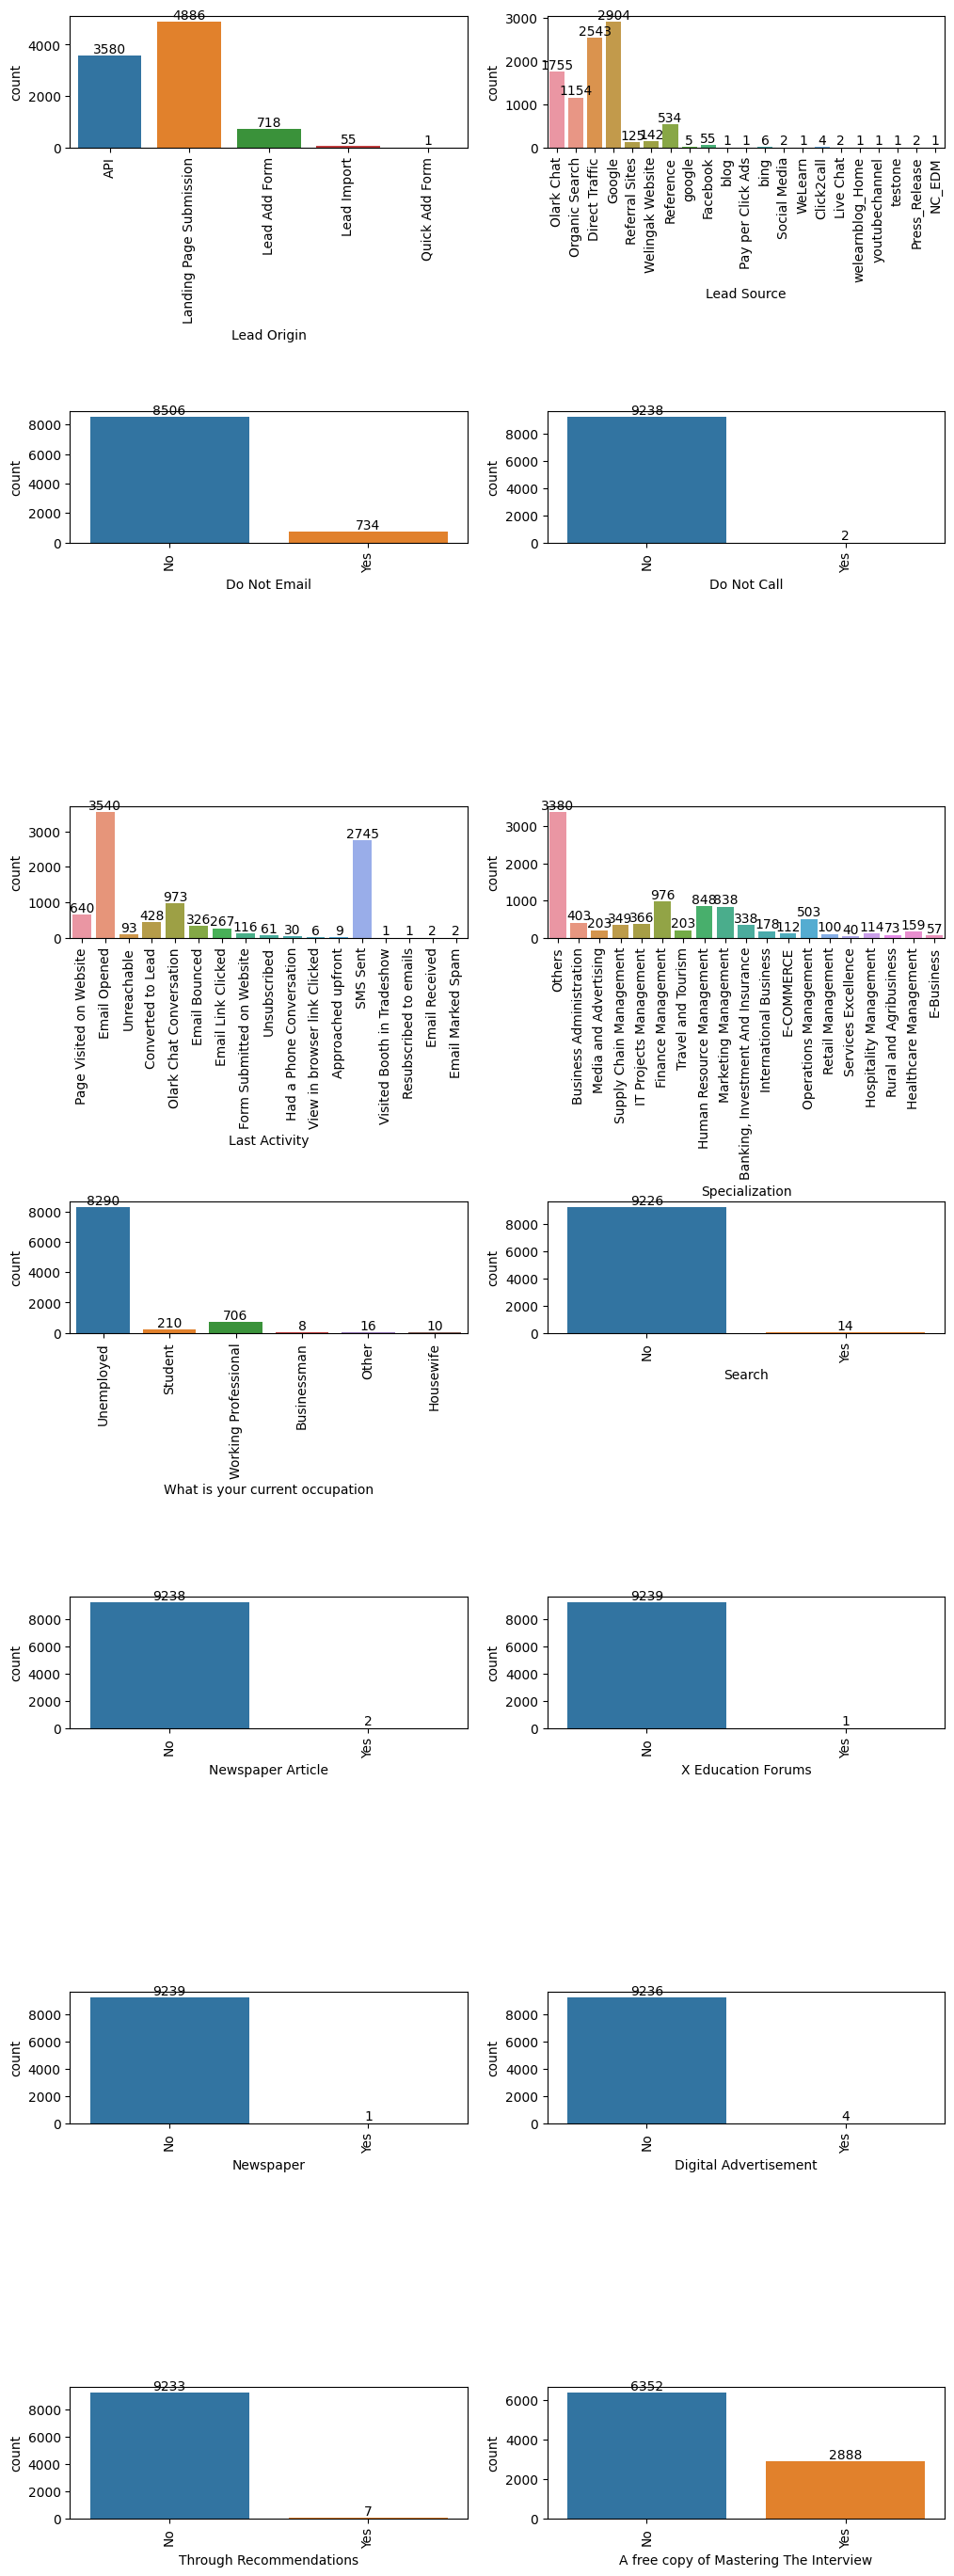

In [ ]:
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = Leads_df.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=Leads_df)
    plt.xticks(rotation=90)

    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.show()

Following columns have data which is highly skewed :

'Do Not Call',
'Search',
'Newspaper Article',
'X Education Forums',
'Newspaper',
'Digital Advertisement',
'Through Recommendations'.

Therefore, these columns will be excluded from the model, as they lack the potential to enhance its value. Furthermore, skewed variables have the potential to impact the performance of logistic regression models, introducing the possibility of biased or erroneous parameter estimates.

In [ ]:
# Dropping categorical columns with highly skewed data

print("Before Drop: ",Leads_df.shape)
Leads_df.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",Leads_df.shape)

Before Drop:  (9240, 18)
After Drop:  (9240, 11)


In [ ]:
Leads_df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

With this Data is clean from any missing value.
Now we can proceed for standardize values.

**3.5 Outlier Analysis**

**1)For Numerical Columns**

In [ ]:
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = Leads_df[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

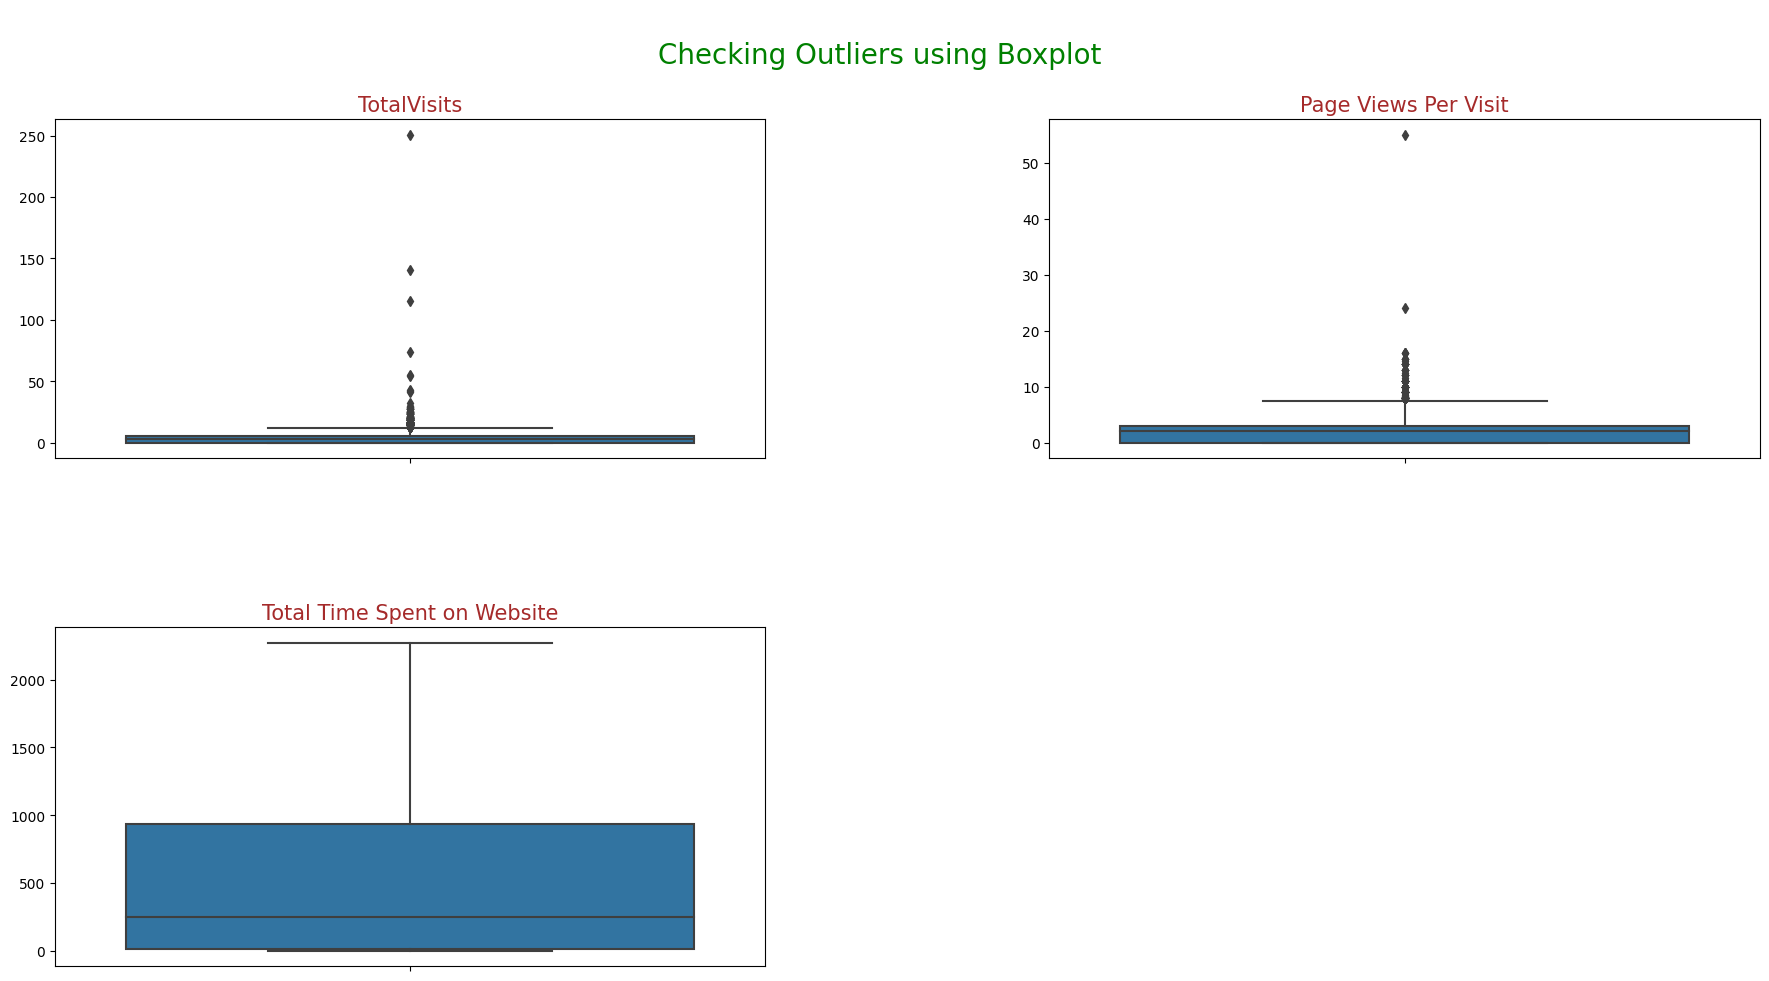

In [ ]:
# Checking outliers for numerical variables other than target variable
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF
Check_Outliers(Leads_df,num_cols)

"TotalVisits" and "Page Views Per Visit": Both of these variables exhibit outliers, which are evident from the boxplot. Consequently, it is essential to address these outliers in order to effectively manage these variables.






**2) Capping Outliers for the treatment**

In [ ]:
# before outlier treatment
Leads_df.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.394156                   487.698268   
std       0.486714     4.836682                   548.021466   
min       0.000000     0.000000                     0.000000   
10%       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
95%       1.000000    10.000000                  1562.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.327787  
std                2.164258  
min                0.000000  
10%                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
95%                6.000000  
max               55.000000

In [ ]:
# Defining UDF to treat outliers via capping and flooring

def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])

In [ ]:
# Checking outliers for numerical variables other than target variable
capping_cols = ["TotalVisits","Page Views Per Visit"]

# UDF
Outlier_treatment(Leads_df,capping_cols)

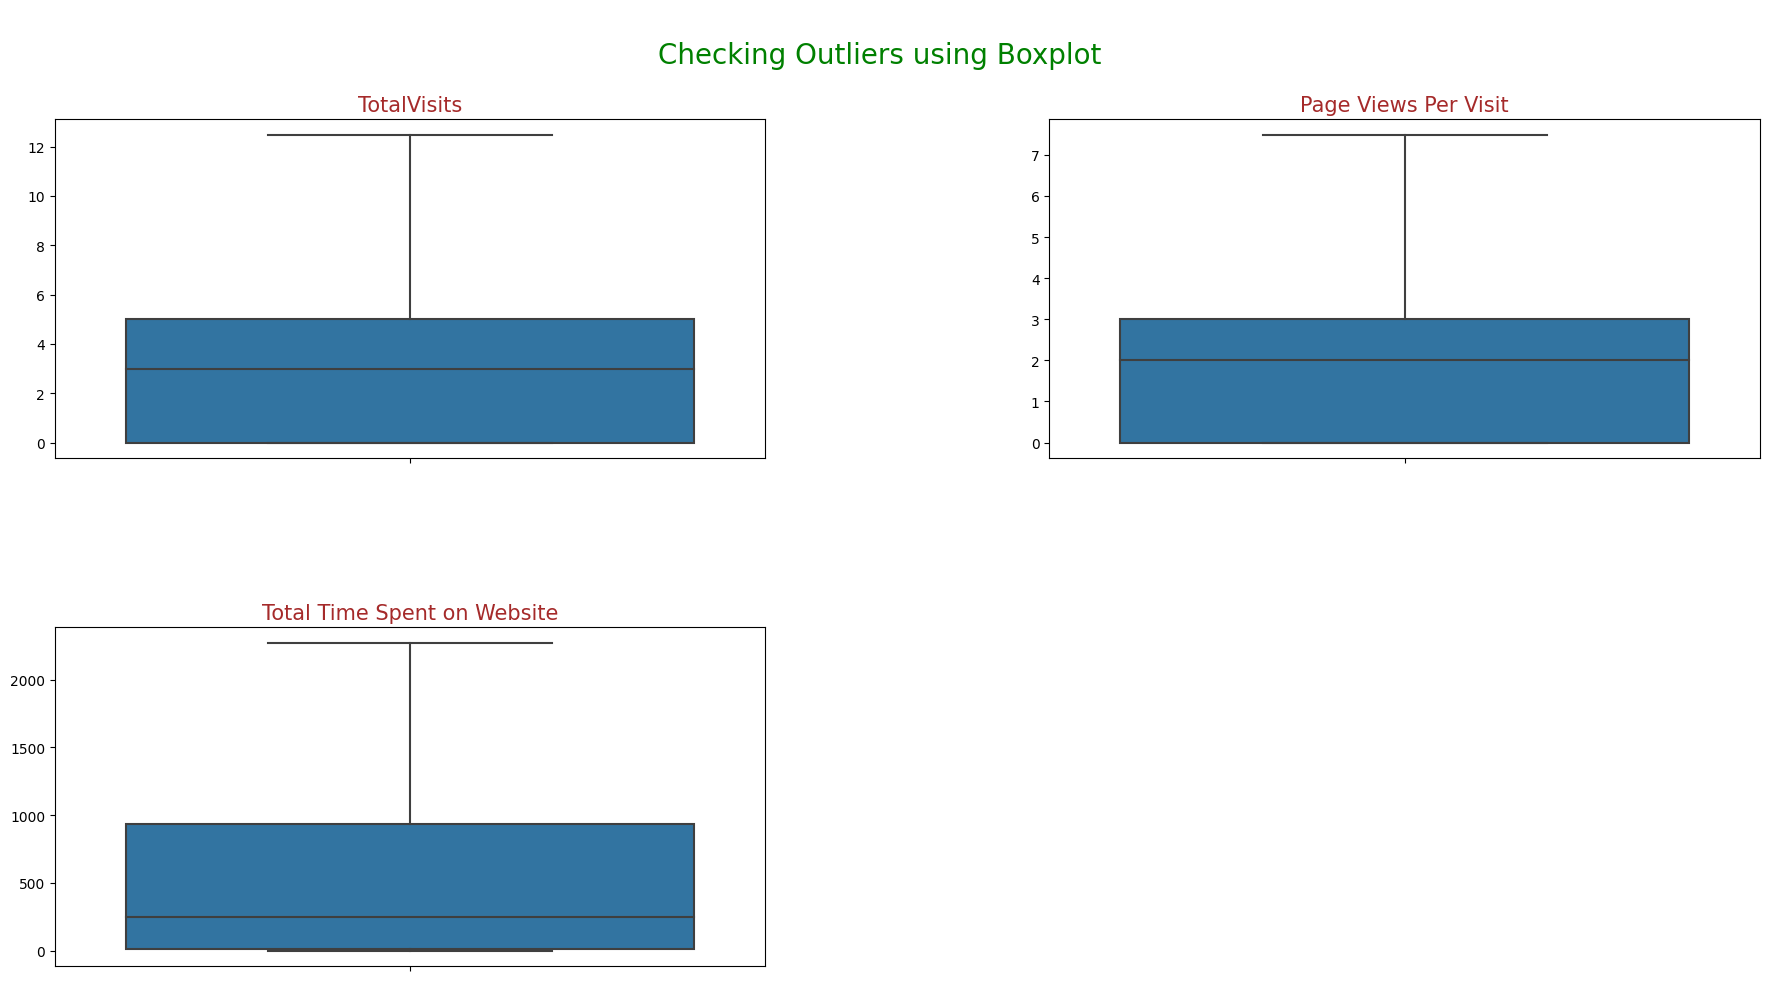

In [ ]:
# Checking Boxplot after Outlier Treatment

num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF for boxplot
Check_Outliers(Leads_df,num_cols)

In [ ]:
# after outlier treatment detailed percentile values
Leads_df.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.213853                   487.698268   
std       0.486714     3.005136                   548.021466   
min       0.000000     0.000000                     0.000000   
10%       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
95%       1.000000    10.000000                  1562.000000   
max       1.000000    12.500000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.274987  
std                1.917776  
min                0.000000  
10%                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
95%                6.000000  
max                7.500000

**3.6 Fixing Invalid values & Standardising Data in columns:**

* Checking if entries in data are in correct format or not , casing styles (UPPER,lower)
* Checking data types of columns

In [ ]:
Leads_df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

In [ ]:
## Categorical Variables

columnsList_cat = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview"]

for i in columnsList_cat:
        perc=100*Leads_df[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("..."*40,"\n")

value_counts % for : Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

........................................................................................................................ 

value_counts % for : Lead Source 

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.0108

We've observed that certain categories/levels within the "Lead Score" and "Last Activity" columns contain a limited number of entries. In order to avoid generating an excessive number of columns while creating dummy variables, our intention is to consolidate these categories as "Others." This approach will help maintain a clean and organized dataset structure.

Additionally, it's apparent that "Google" and "google" are essentially the same in the "Lead Source" column. Therefore, we will unify the case to ensure consistency.

**3.6.1 Grouping Low frequency values**

In [ ]:
# Grouping low frequency value levels to Others
Leads_df['Lead Source'] = Leads_df['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google
Leads_df['Lead Source'] = Leads_df['Lead Source'].replace("google","Google")

In [ ]:
# value_counts percentage after replace
Leads_df["Lead Source"].value_counts(normalize=True)*100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64

In [ ]:
# Grouping low frequency value levels to Others
Leads_df['Last Activity'] = Leads_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation',
                                                               'Approached upfront',
                                                               'View in browser link Clicked',
                                                               'Email Marked Spam',
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [ ]:
# value_counts percentage after replace
Leads_df['Last Activity'].value_counts(normalize=True)*100

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

In [ ]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
Leads_df.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Renaming column name to "Current_occupation" from "What is your current occupationA free copy of Mastering The Interview"
Leads_df.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)

* "Do Not Email" & "Free_copy" both are binary categorical columns lets map both of them yes/no to 1/0 *

**3.6.2 Mapping Binary categorical variables**

In [ ]:
# Mapping binary categorical variables (Yes/No to 1/0)
Leads_df['Do Not Email'] = Leads_df['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

Leads_df['Free_copy'] = Leads_df['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

**3.6.3 Checking Data-types of variables**

In [ ]:
Leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  Free_copy                    9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


The data types appear to be suitable and no modifications are necessary.

**Step 4: Data Analysis (EDA)**

**4.1 Checking if Data is Imbalanced or not**

Data imbalance arises when there is a significant presence of one value, considered the majority, and a relatively lower occurrence of another value, representing the minority. This results in an uneven distribution of observations within the dataset.

This imbalance pertains specifically to the target variable, which is labeled as 'Converted.' This variable indicates the outcome of whether a previous lead was converted or not. In this context, a value of 1 indicates conversion, while a value of 0 indicates non-conversion.

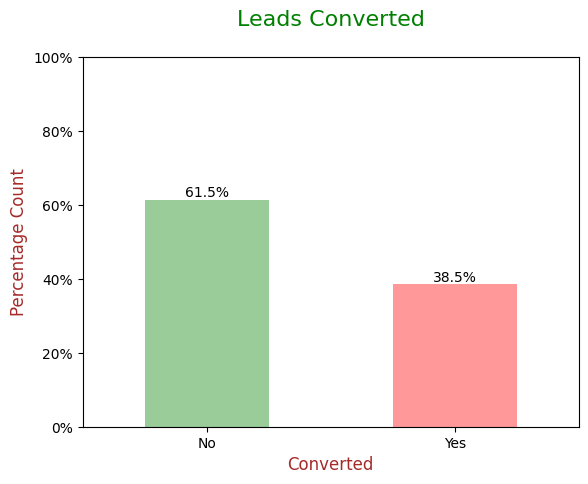

In [ ]:
## ploting the results on bar plot

ax=(100*Leads_df["Converted"].value_counts(normalize=True)).plot.bar(color=["Green","Red"],alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})


# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks]
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

**Observations:**

The conversion rate stands at 38.5%, signifying that only a minority, or 38.5% of individuals, have transitioned into leads. Conversely, the majority, or 61.5% of individuals, did not convert into leads.

In [ ]:
### Ratio of Data Imbalance
ratio=(Leads_df["Converted"].value_counts(normalize=True).loc[0])/(Leads_df["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.59 : 1


**4.2 Univariate Analysis**

In [ ]:
Leads_df.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

   Free_copy  
0          0  
1          0  
2          1  
3          0  
4          0

In [ ]:
Leads_df.shape

(9240, 11)

**4.2.1 Univariate Analysis for Categorical Variables**

In [ ]:
#List of categorical columns
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Free_copy","Lead Source","Last Activity","Specialization"]

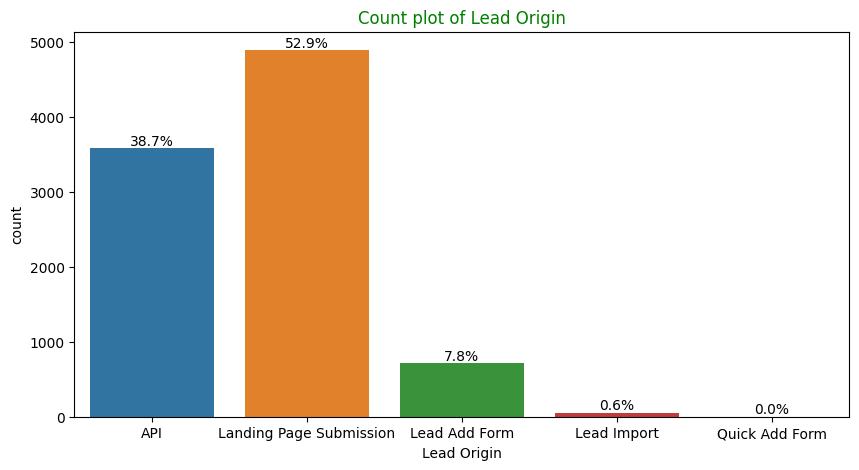

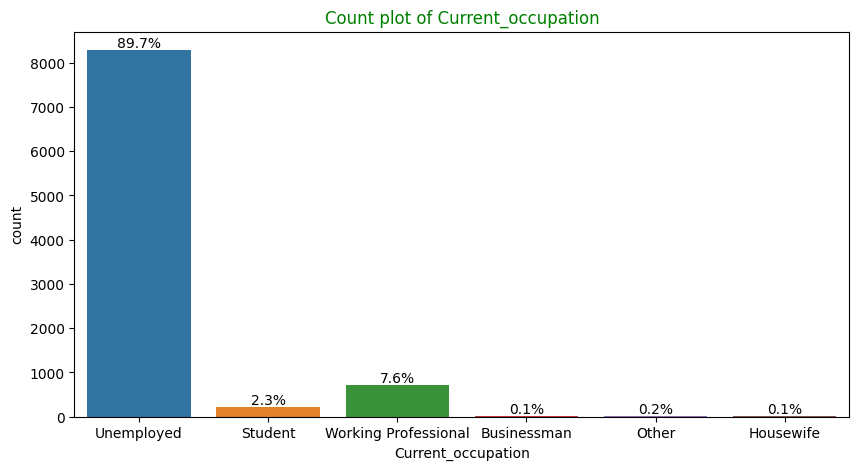

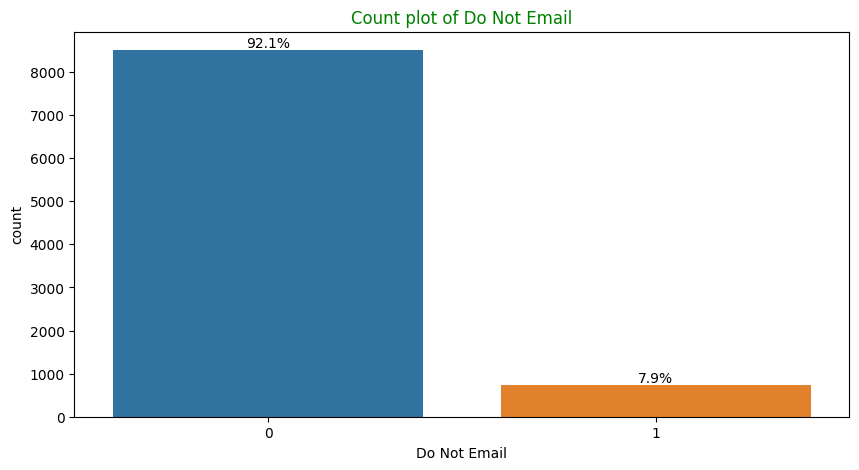

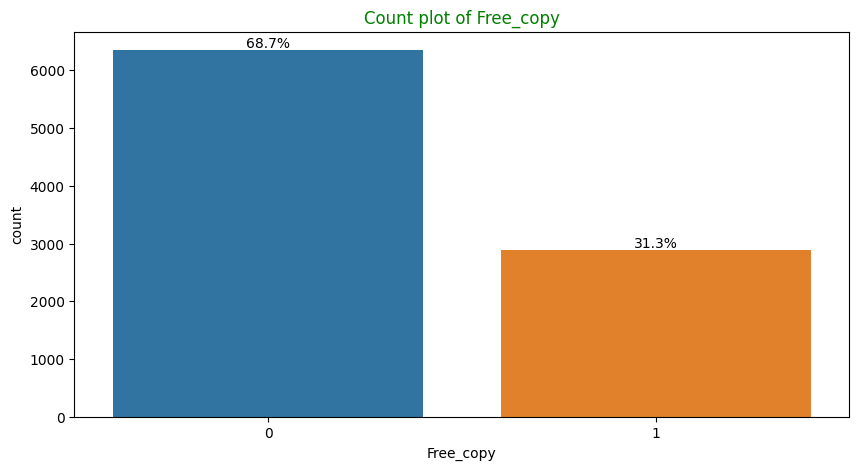

In [ ]:
# countplot of columns with its value_counts percentage as annotation
for i in cat_cols[:4]:

    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=Leads_df)
    total=len(Leads_df[i])
    plt.xticks(rotation=0)

    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


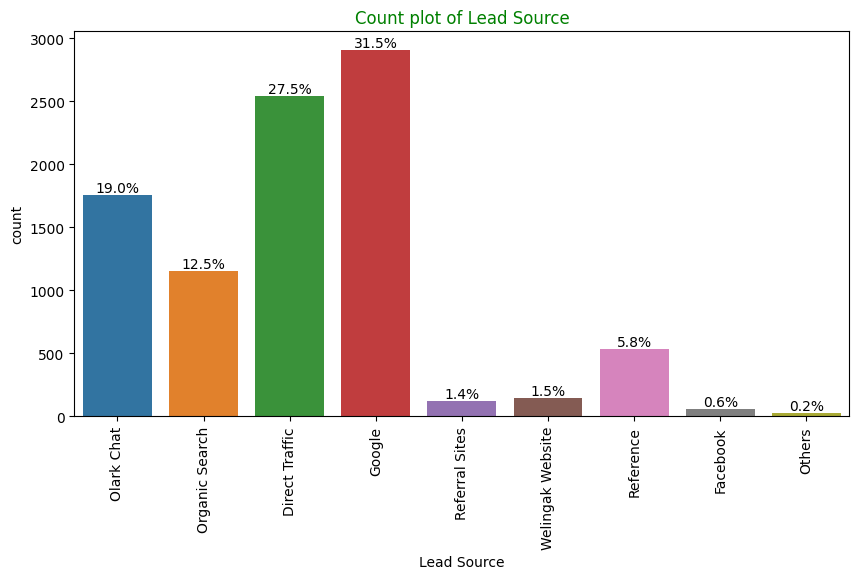

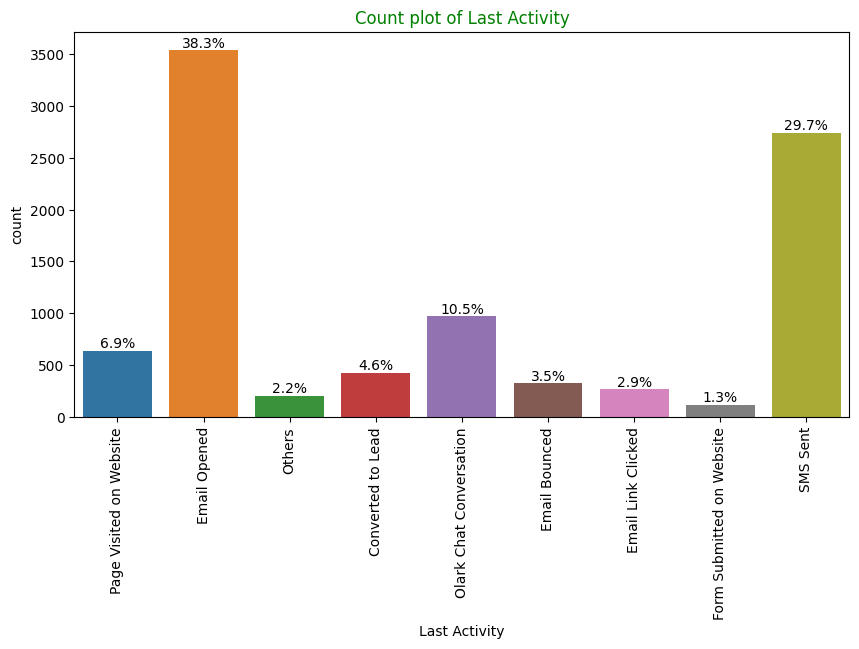

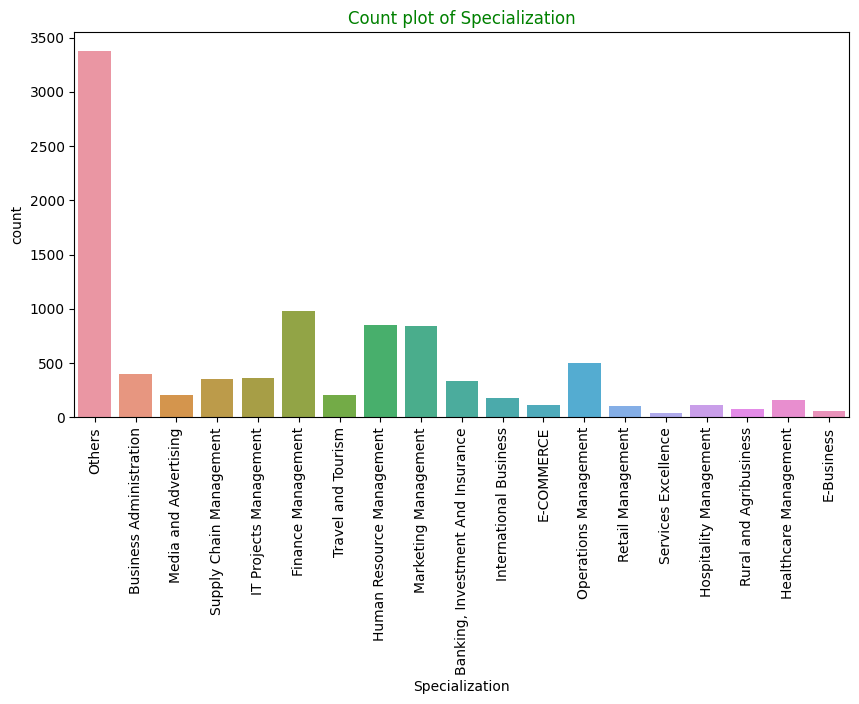

In [ ]:
# countplot for remaining columns from cat_cols (Did separate to rotate xticks 90* so labels doesnt become messy)
for i in cat_cols[4:]:

    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=Leads_df)
    total=len(Leads_df[i])
    plt.xticks(rotation=90)


    if i!="Specialization":        # (not doing for Specialization xtick labels will be messy)
        for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    else:
        pass


**Findings:**

* During the process of Categorical Univariate Analysis, we gain insight into the distribution of values within each variable, represented as a percentage of the total count.

* This provides us with preliminary insights into the variables that are suitable for Bivariate analysis, aiding us in identifying relationships between different variables.

**Univariate Observations:**

Here is a compilation of features derived from variables, encompassing both "Converted" and "Not Converted" categories:

- **Lead Origin:** "Landing Page Submission" accounted for 53% of the customers, while "API" represented 39%.

- **Current Occupation:** The majority, or 90%, of customers were categorized as "Unemployed."

- **Do Not Email:** Approximately 92% of individuals indicated their preference to not receive emails about the course.

- **Lead Source:** The combined percentage for "Google" and "Direct Traffic" as the lead sources was 58%.

- **Last Activity:** 68% of customers were involved in activities related to "SMS Sent" and "Email Opened."

Please note that these insights will prove valuable for subsequent Bivariate Analysis endeavors.







**4.3 Bivariate Analysis**

**4.3.1 Bivariate Analysis for Categorical Variables**

In [ ]:
# UDF "Bivariate_cat" tells comparision between Actual Distribution (value_count percentage) from the data and
# 2nd graph tell the Lead Conversion Rate in percentage (how much leads are converted from 1st plot distribution)

def Bivariate_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name),color="Brown", fontsize=18)

    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name),color="green")
    ax=sns.countplot(x=variable_name,hue=Target,data=Leads_df,palette="prism_r",alpha=0.46)

    total=len(Leads_df[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")

    # Annotation for 1st plot
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name),color="blue",fontsize=12)
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="BuGn",alpha=0.85)   #ax1 is for annotation

    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")

    # Annotation for 2nd plot
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

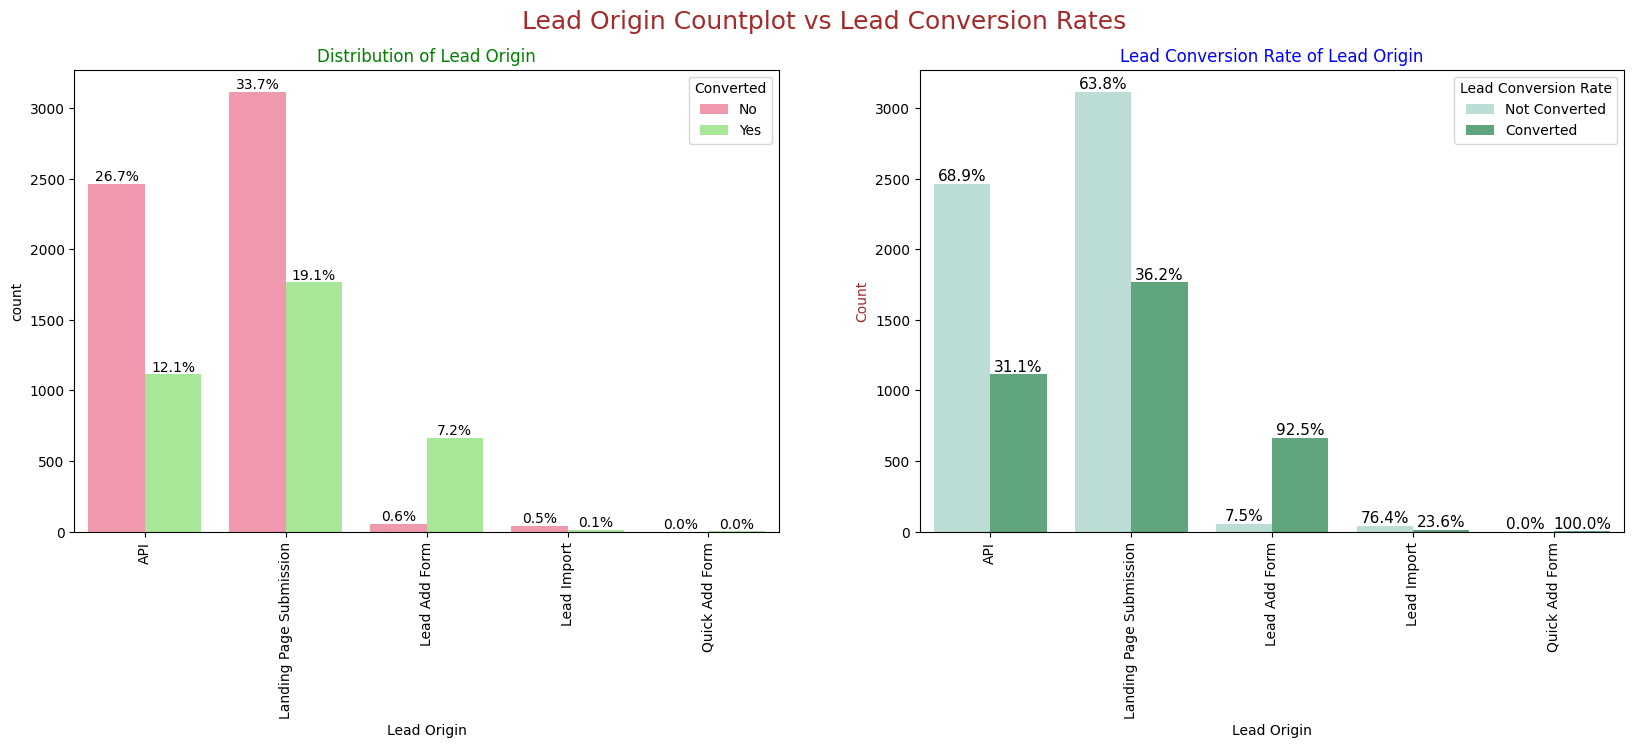

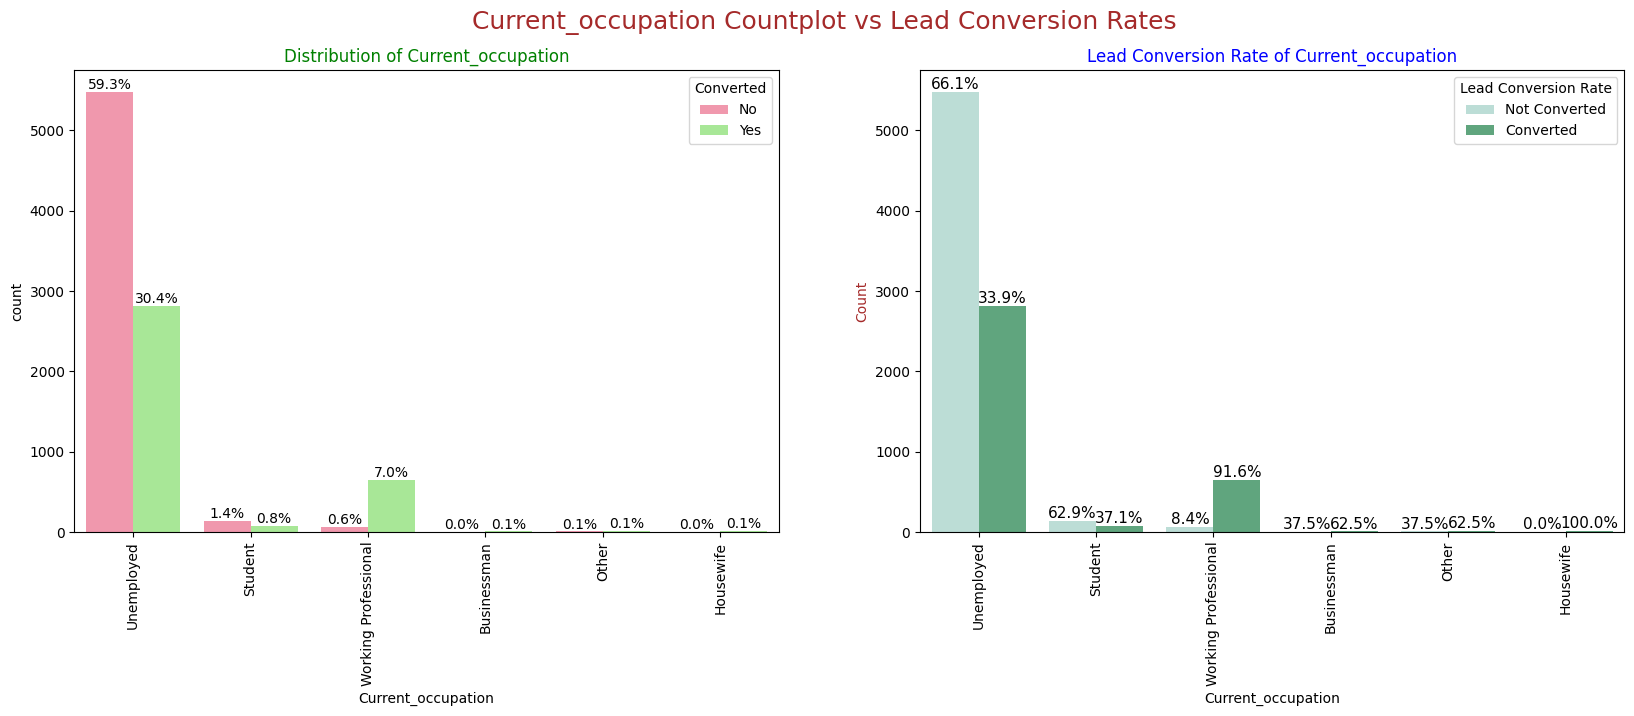

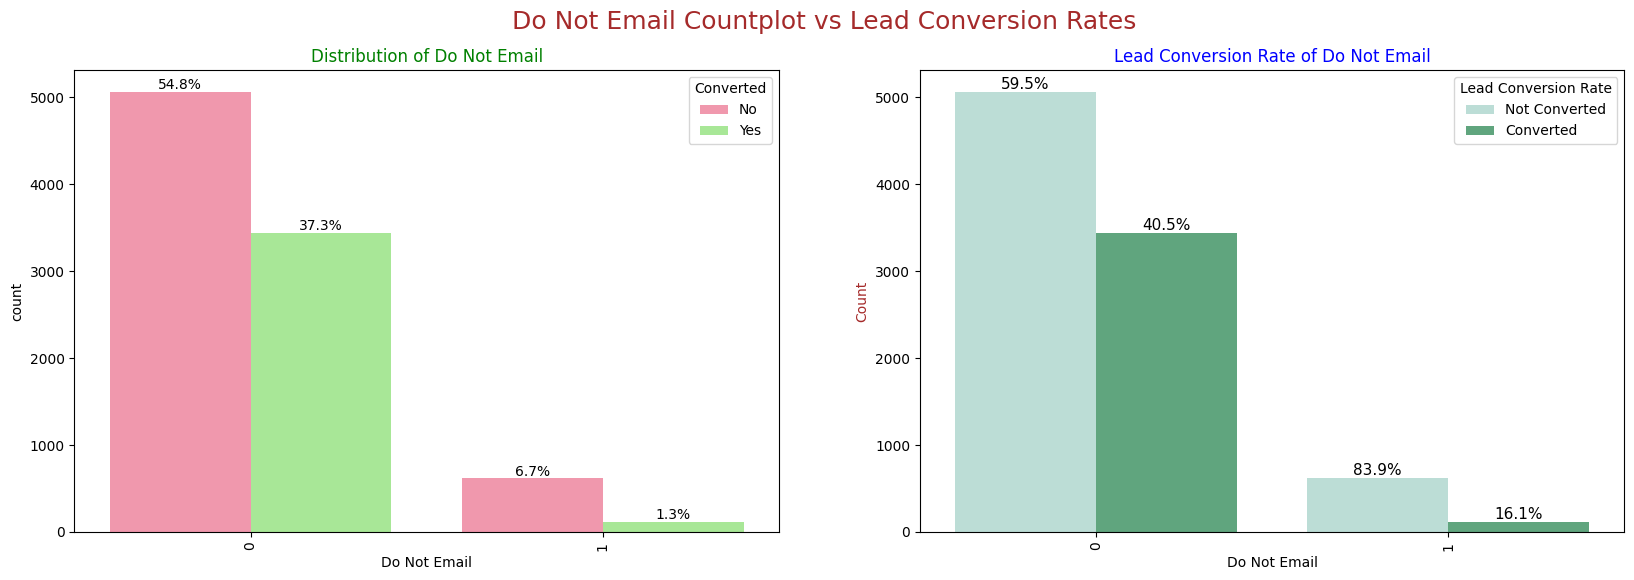

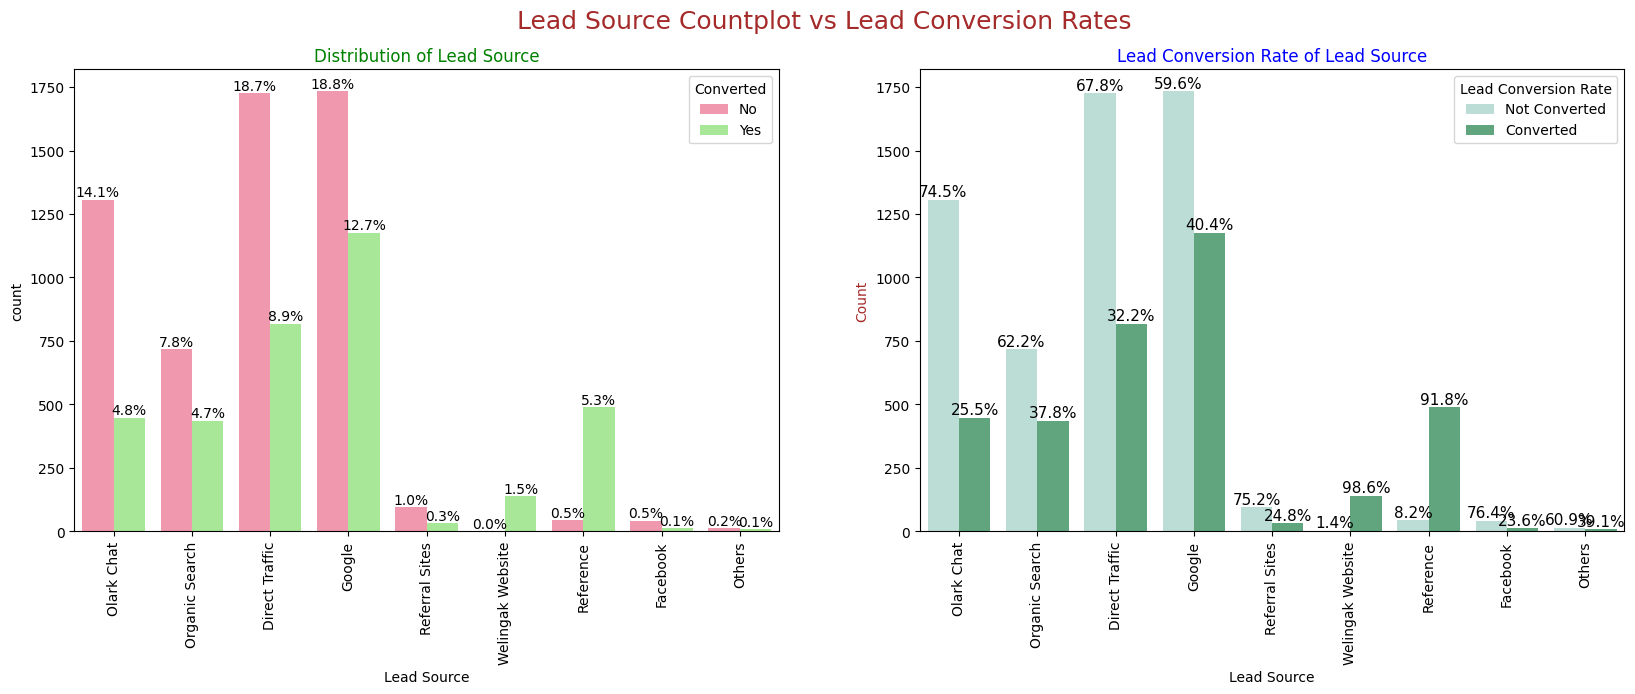

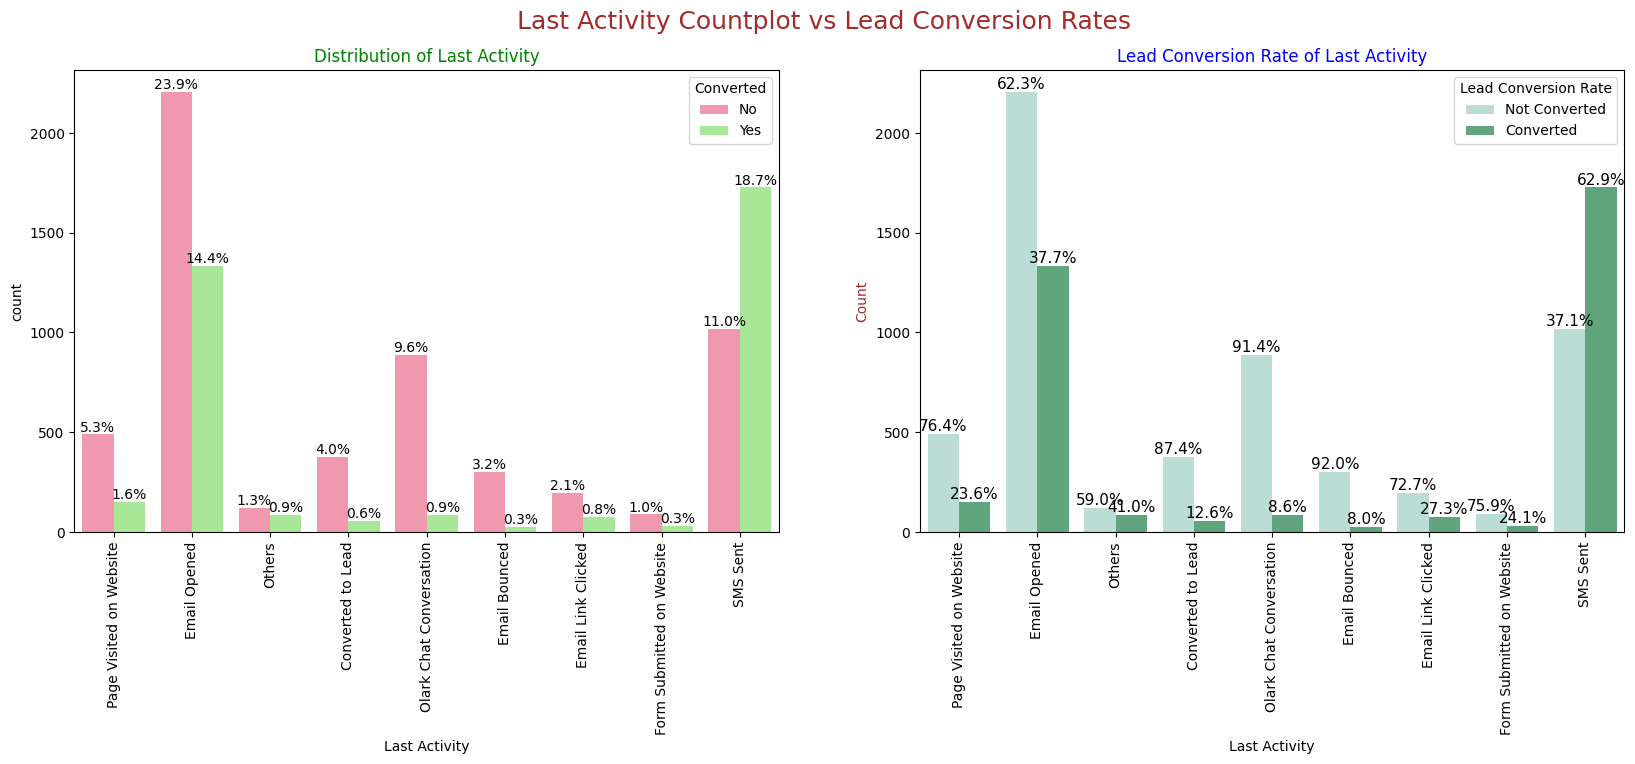

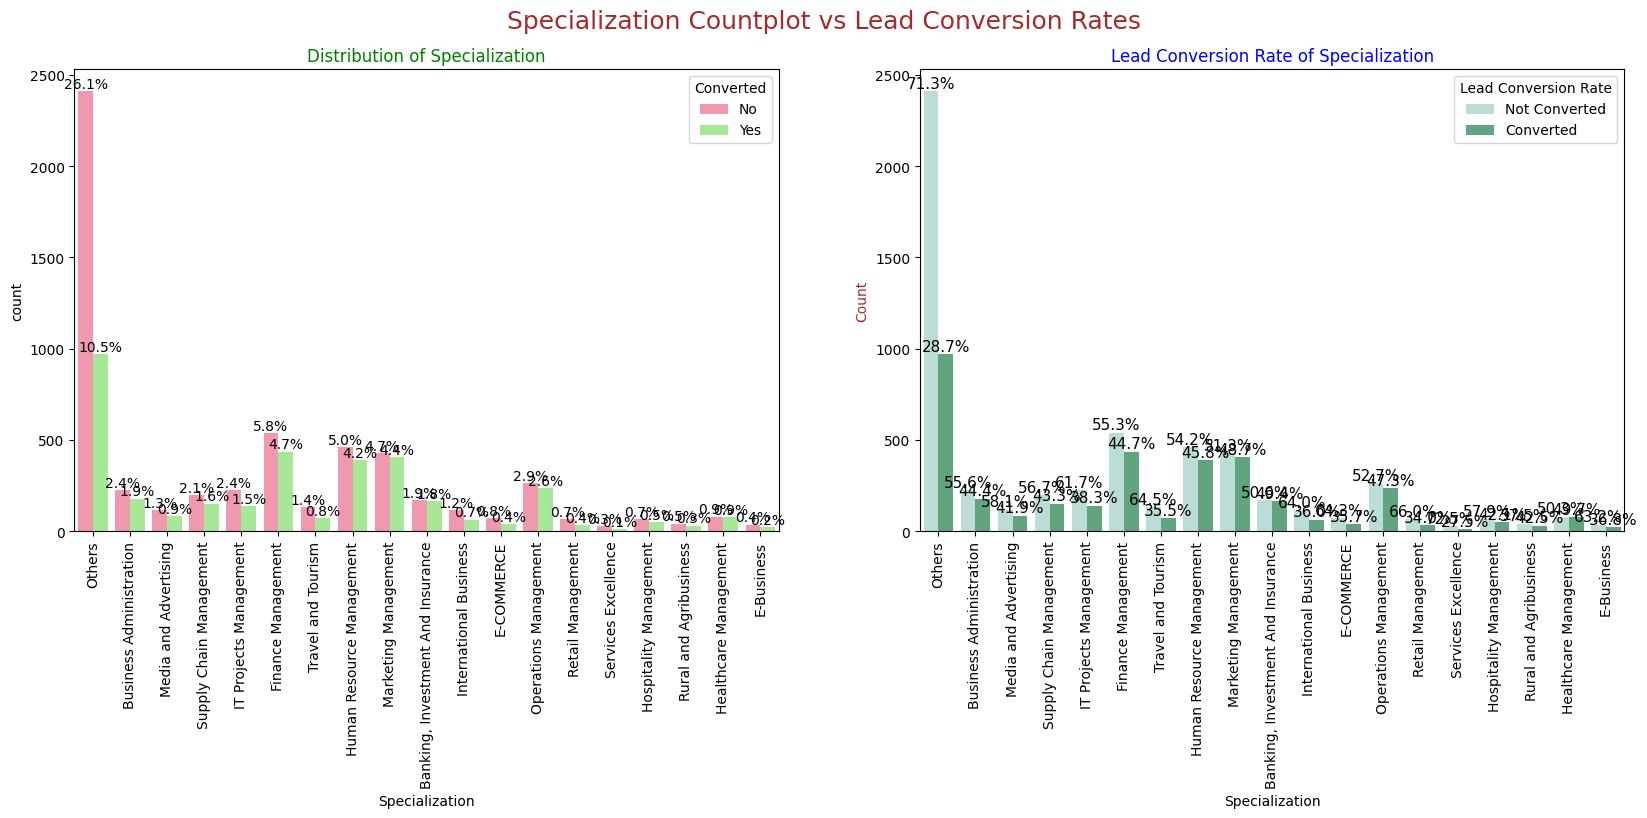

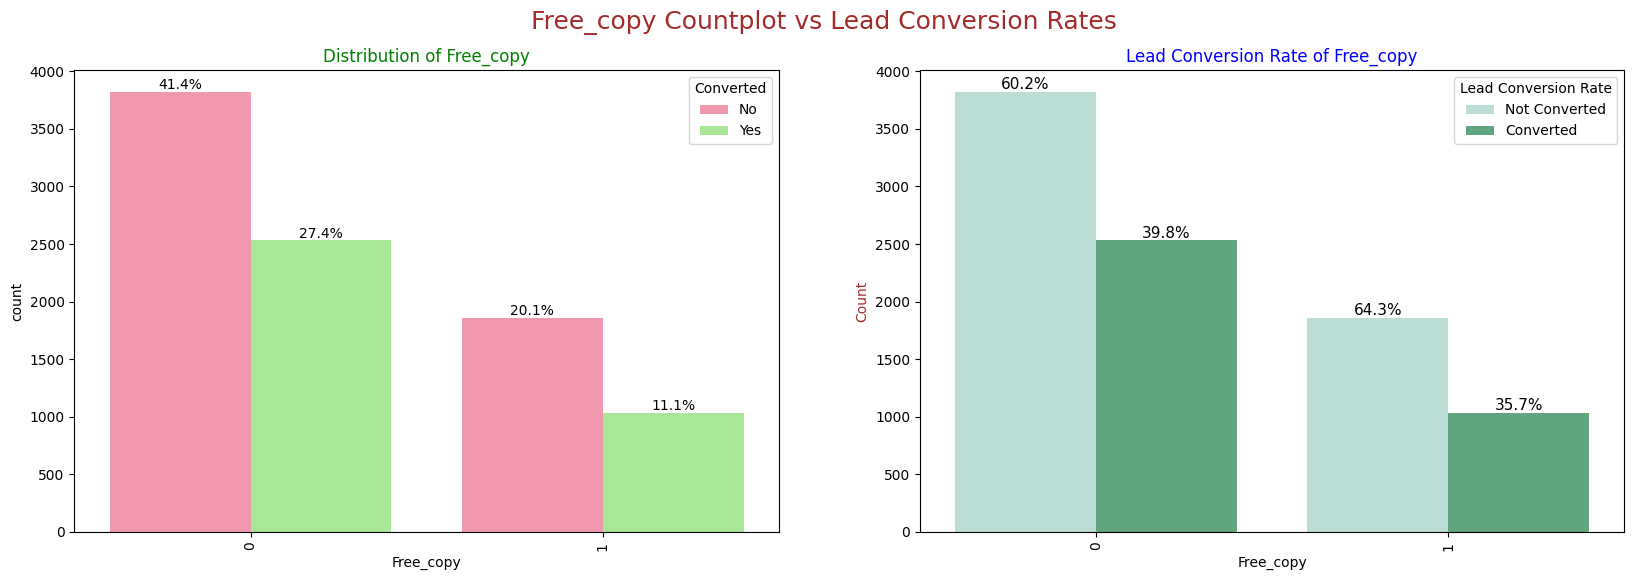

In [ ]:
# Bivariate Analysis for all these variables using loop and UDF
# Comparision between variables w.r.t. 'Converted' (Target variable) , taking one categorical column w.r.t target variable as 'hue'
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Lead Source","Last Activity","Specialization","Free_copy"]

for i in cat_cols:
    Bivariate_cat(Leads_df,variable_name=i)


**Findings:**

- Lead Origin: Roughly 52% of all leads originated from "Landing Page Submission," exhibiting a lead conversion rate (LCR) of 36%. Meanwhile, the "API" accounted for approximately 39% of customers, demonstrating a lead conversion rate (LCR) of 31%.

- Current Occupation: About 90% of customers fall into the "Unemployed" category, boasting a lead conversion rate (LCR) of 34%. In contrast, "Working Professionals" make up a mere 7.6% of the total customer base, yet exhibit an impressive lead conversion rate (LCR) of nearly 92%.

- Do Not Email: An overwhelming 92% of individuals have chosen to opt out of receiving course-related emails.

Please note: In our discussions, we've abbreviated "Lead Conversion Rate" as LCR.







- Lead Source: Among the customers, Google boasts an impressive lead conversion rate (LCR) of 40%, originating from 31% of the customer pool. Direct Traffic contributes a LCR of 32%, with 27% of customers associated with this source, albeit lower than Google. Organic Search yields a noteworthy LCR of 37.8%, but its contribution comes from just 12.5% of customers. Reference showcases a remarkable LCR of 91%, yet only around 6% of customers are attributed to this lead source.

- Last Activity: The activity 'SMS Sent' demonstrates a notably high lead conversion rate of 63%, stemming from a 30% contribution in terms of last activities. 'Email Opened' activities account for 38% of the last activities conducted by customers, yielding a 37% lead conversion rate.

- Specialization: Disciplines such as Marketing Management, HR Management, and Finance Management exhibit substantial contributions.






**4.3.2 Bivariate Analysis for Numerical Variables**

<Figure size 1600x400 with 0 Axes>

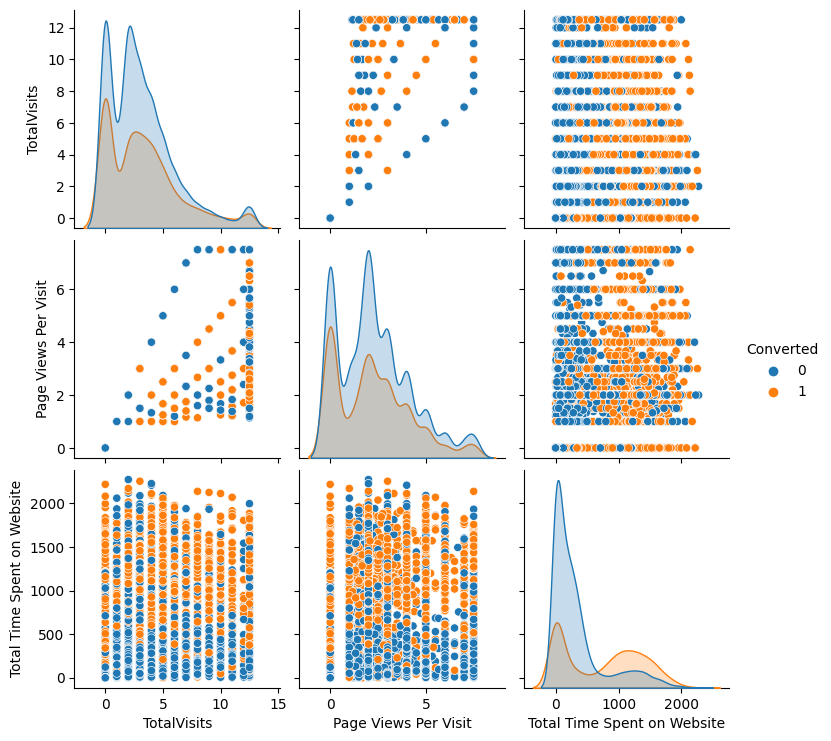

In [ ]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=Leads_df,vars=num_cols,hue="Converted")
plt.show()

In [ ]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

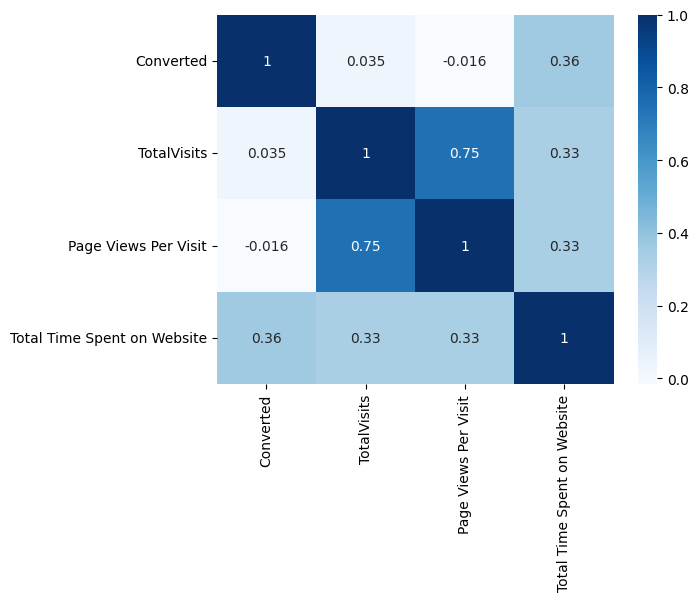

In [ ]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=Leads_df[num_cols].corr(),cmap="Blues",annot=True)
plt.show()

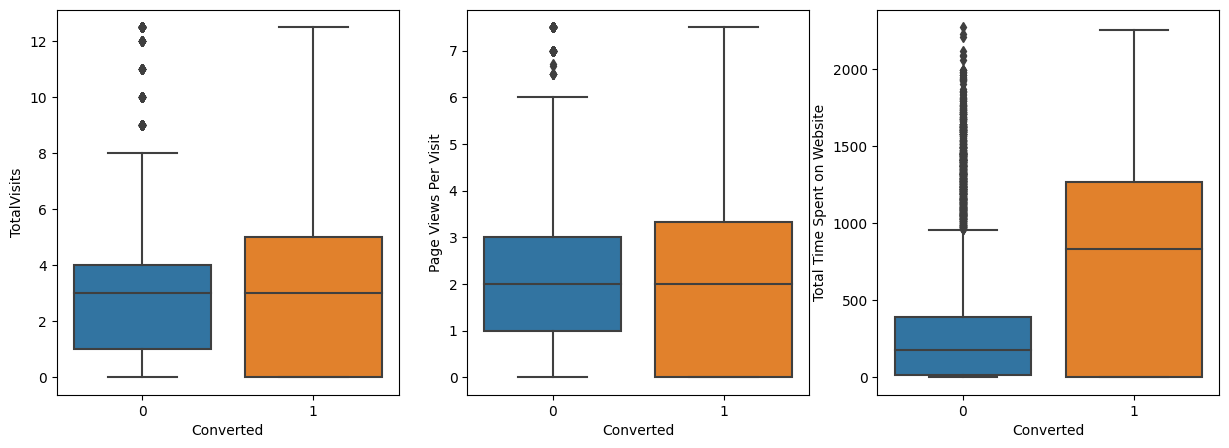

In [ ]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = Leads_df)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = Leads_df)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = Leads_df)
plt.show()

Insights:

Past Leads who spends more time on Website are successfully converted than those who spends less as seen in the boxplot

**STEP 5: DATA PREPARATION**

**5.1 Dummy Variables**

For categorical variables with multiple levels, create dummy features (one-hot encoded)
Binary level categorical columns are already mapped to 1 / 0 in previous steps, So start with Dummy variable creation

In [ ]:
Leads_df.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

   Free_copy  
0          0  
1          0  
2          1  
3          0  
4          0

In [ ]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(Leads_df[["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"]], drop_first=True)

# Adding the results to the master dataframe
Leads_df = pd.concat([Leads_df, dummy], axis=1)

In [ ]:
Leads_df.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

   Free_copy  Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0          0                                    0                          0   
1          0                                    0                          0   
2          1                                    1                          0   
3          0                                    1                          0   
4          0                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0           

In [ ]:
# We have created dummies for the below variables, so we can drop them

Leads_df = Leads_df.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"],1)

In [ ]:
Leads_df.shape

(9240, 49)

In [ ]:
Leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Free_copy                                 9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 8   Lead Origin_Lead Import                   9240 non-null   uint8  
 9   Lead Origin_Quick Add Form                9240 non-null   uint8  
 10  Lead Source_Facebook                

### **Step 6: Test-Train Split**

In [ ]:
# Putting predictor variables to X
X = Leads_df.drop('Converted', axis=1)

# Putting Target variables to y
y = Leads_df["Converted"]

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 48) 
y_train: (6468,)


In [ ]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 48) 
y_test: (2772,)


### **Step 7: Feature Scaling**

In [ ]:
# using standard scaler for scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [ ]:
# X-train dataframe after standard scaling
X_train.head()


Do Not Email  TotalVisits  Total Time Spent on Website  \
1871     -0.291638    -1.064974                    -0.885371   
6795     -0.291638     0.262370                     0.005716   
3516     -0.291638     0.594206                    -0.691418   
8105     -0.291638     0.594206                     1.365219   
3934     -0.291638    -1.064974                    -0.885371   

      Page Views Per Visit  Free_copy  Lead Origin_Landing Page Submission  \
1871             -1.184892  -0.673169                                    0   
6795             -0.488713   1.485511                                    1   
3516              0.123715  -0.673169                                    0   
8105              1.432322  -0.673169                                    1   
3934             -1.184892  -0.673169                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
1871                          0                        0   
6795                          0                        0   
3516                          0                        0   
8105                          0                        0   
3934                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
1871                           0                     0                   0   
6795                           0                     0                   0   
3516                           0                     0                   0   
8105                           0                     0                   1   
3934                           0                     0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
1871                       1                           0                   0   
6795                       0                           0                   0   
3516                       1                           0                   0   
8105                       0                           0                   0   
3934                       1                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  \
1871                      0                           0   
6795                      0                           0   
3516                      0                           0   
8105                      0                           0   
3934                      0                           0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
1871                             0                            0   
6795                             0                            0   
3516                             0                            0   
8105                             0                            0   
3934                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
1871                                 0                           1   
6795                                 0                           1   
3516                                 0                           1   
8105                                 0                           0   
3934                                 0                           1   

      Last Activity_Form Submitted on Website  \
1871                                        0   
6795                                        0   
3516                                        0   
8105                                        0   
3934                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
1871                                      0                     0   
6795                                      0                     0   
3516                                      0                     0   
8105                                      0                     0   
3934                  

In [ ]:
# Checking the Lead Conversion Rate (LCR) - "Converted" is our Target Variable
# We will denote Lead Conversion Rate with 'LCR' as its short form

LCR = (sum(Leads_df['Converted'])/len(Leads_df['Converted'].index))*100
LCR

38.53896103896104

**7.1 : Looking at Correlations**

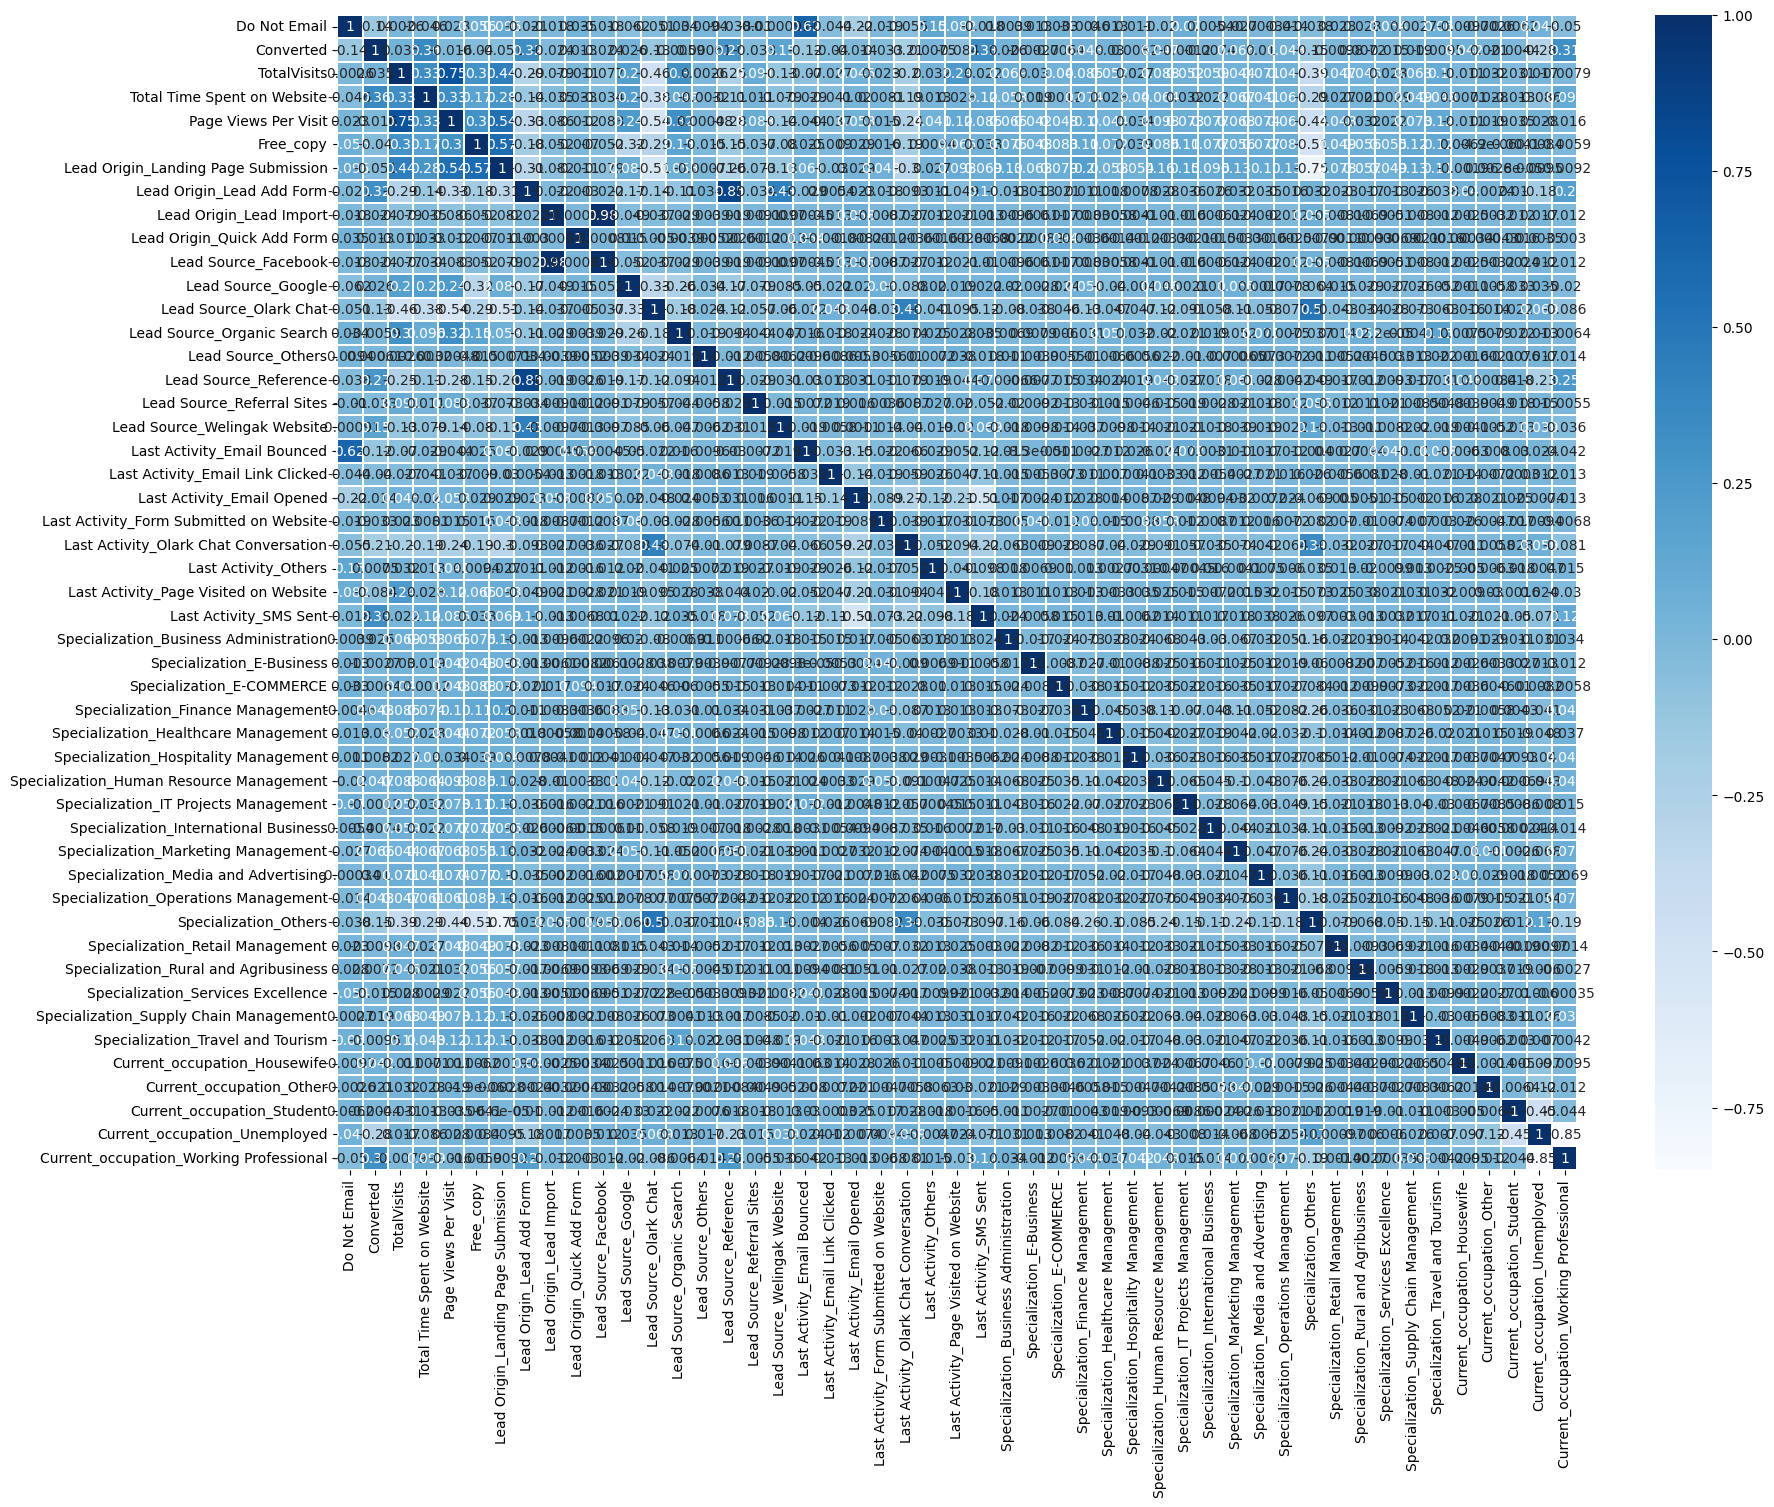

In [ ]:
# analyse correlation matrix
plt.figure(figsize = (20,15))
sns.heatmap(Leads_df.corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

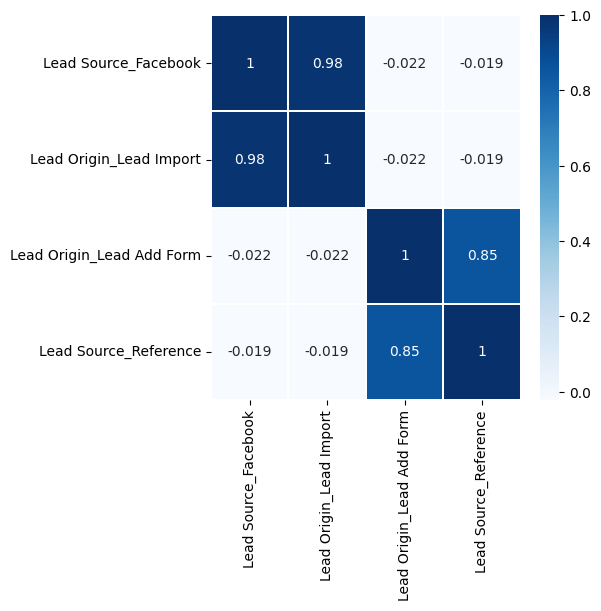

In [ ]:
# as the above heatmap has so many columns lets breakdown suspected variables which migh have high correlation with each other
# analysing variables which might be highly correlated with each other from same class from above graph
plt.figure(figsize = (5,5))
sns.heatmap(Leads_df[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

These predictor variables above are very highly correlated with each other near diagonal with (0.98 and 0.85), it is better that we drop one of these variables from each pair as they won’t add much value to the model. So , we can drop any of them, lets drop 'Lead Origin_Lead Import' and 'Lead Origin_Lead Add Form'.

In [ ]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

### **Step 8: Model Building**

8.1 Feature Selection Using RFE (Recursive Feature Elimination)

In [ ]:
# Lets use RFE to reduce variables
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 11),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Free_copy', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 

In [ ]:
# instead of using as zip using this for more readablility

# Check the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

features  Feature Chosen  Ranking
22                    Last Activity_SMS Sent            True        1
41              Current_occupation_Housewife            True        1
35                     Specialization_Others            True        1
28     Specialization_Hospitality Management            True        1
20                      Last Activity_Others            True        1
19     Last Activity_Olark Chat Conversation            True        1
17                Last Activity_Email Opened            True        1
14              Lead Source_Welingak Website            True        1
12                     Lead Source_Reference            True        1
11                        Lead Source_Others            True        1
45   Current_occupation_Working Professional            True        1
9                     Lead Source_Olark Chat            True        1
7                       Lead Source_Facebook            True        1
5        Lead Origin_Landing Page Submission            True        1
2                Total Time Spent on Website            True        1
44             Current_occupation_Unemployed           False        2
42                  Current_occupation_Other           False        3
43                Current_occupation_Student           False        4
37     Specialization_Rural and Agribusiness           False        5
16          Last Activity_Email Link Clicked           False        6
31     Specialization_International Business           False        7
36          Specialization_Retail Management           False        8
1                                TotalVisits           False        9
3                       Page Views Per Visit           False       10
0                               Do Not Email           False       11
21     Last Activity_Page Visited on Website           False       12
23    Specialization_Business Administration           False       13
15               Last Activity_Email Bounced           False       14
34      Specialization_Operations Management           False       15
29  Specialization_Human Resource Management           False       16
32       Specialization_Marketing Management           False       17
4                                  Free_copy           False       18
6                 Lead Origin_Quick Add Form           False       19
38        Specialization_Services Excellence           False       20
39    Specialization_Supply Chain Management           False       21
8                         Lead Source_Google           False       22
25                 Specialization_E-COMMERCE           False       23
13                Lead Source_Referral Sites           False       24
30     Specialization_IT Projects Management           False       25
27      Specialization_Healthcare Management           False       26
26         Specialization_Finance Management           False       27
10                Lead Source_Organic Search           False       28
18   Last Activity_Form Submitted on Website           False       29
33      Specialization_Media and Advertising           False       30
24                 Specialization_E-Business           False       31
40         Specialization_Travel and Tourism           False       32

In [ ]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_occupation_Housewife',
       'Current_occupation_Working Professional'],
      dtype='object')

In [ ]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit', 'Free_copy',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
      

In [ ]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

**MODEL 1**

In [ ]:
# Building model using statsmodels, for the detailed statistics

# columns selected by RFE to be used for this model
rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()

logm1.params

const                                      -1.033284
Total Time Spent on Website                 1.050544
Lead Origin_Landing Page Submission        -1.272090
Lead Source_Facebook                       -0.696059
Lead Source_Olark Chat                      0.900083
Lead Source_Others                          0.980708
Lead Source_Reference                       2.897685
Lead Source_Welingak Website                5.380227
Last Activity_Email Opened                  0.950623
Last Activity_Olark Chat Conversation      -0.553411
Last Activity_Others                        1.258012
Last Activity_SMS Sent                      2.068763
Specialization_Hospitality Management      -1.072037
Specialization_Others                      -1.193681
Current_occupation_Housewife               23.022209
Current_occupation_Working Professional     2.685466
dtype: float64

In [ ]:
#Let's see the summary of our logistic regression model
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Mon, 14 Aug 2023   Deviance:                       5465.5
Time:                        03:34:26   Pearson chi2:                 8.09e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

The column "Current_occupation_Housewife" will be excluded from the model as its high p-value of 0.999 exceeds the accepted threshold of 0.05 for statistical significance.






**MODEL 2**

In [ ]:
# Dropping 'Current_occupation_Housewife' column
rfe_col=rfe_col.drop("Current_occupation_Housewife")

In [ ]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()

logm2.params

const                                     -1.025075
Total Time Spent on Website                1.049364
Lead Origin_Landing Page Submission       -1.267369
Lead Source_Facebook                      -0.696913
Lead Source_Olark Chat                     0.899051
Lead Source_Others                         0.973897
Lead Source_Reference                      2.917123
Lead Source_Welingak Website               5.379144
Last Activity_Email Opened                 0.949036
Last Activity_Olark Chat Conversation     -0.558345
Last Activity_Others                       1.248172
Last Activity_SMS Sent                     2.058828
Specialization_Hospitality Management     -1.079528
Specialization_Others                     -1.197801
Current_occupation_Working Professional    2.677350
dtype: float64

In [ ]:
#Let's see the summary of our logistic regression model
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.3
Date:                Mon, 14 Aug 2023   Deviance:                       5480.7
Time:                        03:34:26   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3825
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

 "Lead Source_Facebook" column will be removed from model due to high p-value of 0.187, which is above the accepted threshold of 0.05 for statistical significance.

**MODEL 3**

In [ ]:
# Dropping 'Lead Source_Facebook' column
rfe_col=rfe_col.drop("Lead Source_Facebook")

In [ ]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()

logm3.params

const                                     -1.040542
Total Time Spent on Website                1.051824
Lead Origin_Landing Page Submission       -1.249311
Lead Source_Olark Chat                     0.916940
Lead Source_Others                         0.981395
Lead Source_Reference                      2.937179
Lead Source_Welingak Website               5.396676
Last Activity_Email Opened                 0.943420
Last Activity_Olark Chat Conversation     -0.558250
Last Activity_Others                       1.248700
Last Activity_SMS Sent                     2.055550
Specialization_Hospitality Management     -1.090368
Specialization_Others                     -1.194330
Current_occupation_Working Professional    2.675678
dtype: float64

In [ ]:
#Let's see the summary of our logistic regression model
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Mon, 14 Aug 2023   Deviance:                       5482.6
Time:                        03:34:26   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

"Lead Source_Others" column will be removed from model due to high p-value of 0.055, which is above the accepted threshold of 0.05 for statistical significance.

**MODEL 4**

In [ ]:
# Dropping '"Lead Source_Others"' column
rfe_col=rfe_col.drop("Lead Source_Others")

In [ ]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()

logm4.params

const                                     -1.023594
Total Time Spent on Website                1.049789
Lead Origin_Landing Page Submission       -1.258954
Lead Source_Olark Chat                     0.907184
Lead Source_Reference                      2.925326
Lead Source_Welingak Website               5.388662
Last Activity_Email Opened                 0.942099
Last Activity_Olark Chat Conversation     -0.555605
Last Activity_Others                       1.253061
Last Activity_SMS Sent                     2.051879
Specialization_Hospitality Management     -1.094445
Specialization_Others                     -1.203333
Current_occupation_Working Professional    2.669665
dtype: float64

In [ ]:
#Let's see the summary of our logistic regression model
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.1
Date:                Mon, 14 Aug 2023   Deviance:                       5486.1
Time:                        03:34:26   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Model 4 is stable and has significant p-values within the threshold (p-values < 0.05), so we will use it for further analysis.

Now lets check VIFs for these variables to check if there is any multicollinearity which exists among the independent variables

In [ ]:
# Now checking VIFs for all variables in the Model 4
get_vif(X_train_rfe)

Features   VIF
0                     Specialization_Others  2.47
1       Lead Origin_Landing Page Submission  2.45
2                Last Activity_Email Opened  2.36
3                    Last Activity_SMS Sent  2.20
4                    Lead Source_Olark Chat  2.14
5     Last Activity_Olark Chat Conversation  1.72
6                     Lead Source_Reference  1.31
7               Total Time Spent on Website  1.24
8   Current_occupation_Working Professional  1.21
9              Lead Source_Welingak Website  1.08
10                     Last Activity_Others  1.08
11    Specialization_Hospitality Management  1.02

No variables need to be excluded, as all of them exhibit favorable VIF values below 5.

The p-values for all variables are below 0.05, indicating strong statistical significance. With both p-values and VIFs well within acceptable limits, the model appears to be in good shape. Consequently, we will proceed to finalize Model 4 for the purpose of model evaluation.

### **STEP 9: MODEL EVALUATION**

In [ ]:
# Getting the predicted values on the train set
y_train_pred = logm4.predict(sm.add_constant(X_train_sm4))

y_train_pred[:10]


1871    0.474082
6795    0.073252
3516    0.249087
8105    0.768973
3934    0.212973
4844    0.987807
3297    0.108454
8071    0.996128
987     0.169259
7423    0.869641
dtype: float64

In [ ]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.47408215, 0.07325161, 0.24908697, 0.7689732 , 0.2129729 ,
       0.9878074 , 0.1084541 , 0.99612765, 0.16925902, 0.86964073])

In [ ]:
# Create a new dataframe with the actual conversion flag and the probabilities predicted by the final model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Conversion_Prob  Prospect ID
0          0         0.474082         1871
1          0         0.073252         6795
2          0         0.249087         3516
3          0         0.768973         8105
4          0         0.212973         3934

Now, the task at hand involves determining the optimal cutoff threshold value for the probability. We will initiate this process by using the default value of 0.5. Additionally, we will introduce a new feature named "predicted" in the DataFrame, utilizing the generated probabilities.

In [ ]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Conversion_Prob  Prospect ID  Predicted
0          0         0.474082         1871          0
1          0         0.073252         6795          0
2          0         0.249087         3516          0
3          0         0.768973         8105          1
4          0         0.212973         3934          0

In [ ]:
# Create confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3588  414]
 [ 846 1620]]


In [ ]:
# Predicted   Not Converted    Converted
# Actual
# not_churn        3588          414
# churn            846           1620

In [ ]:
# Let's check the overall accuracy of the model

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8051948051948052


In [ ]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Calculation of sensitivity

TP/(TP+FN)

0.656934306569343

In [ ]:
# Calculation of specificity

TN/(TN+FP)

0.896551724137931

In [ ]:
# Calculation of false postive rate - predicting conversion not have converted
print(FP/ float(TN+FP))

0.10344827586206896


In [ ]:
# positive predicted value
print (TP / float(TP+FP))

0.7964601769911505


In [ ]:
# Negative predicted value
print (TN / float(TN+ FN))

0.8092016238159675


#### 9**.1 ROC Curve Plotting**

In [ ]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

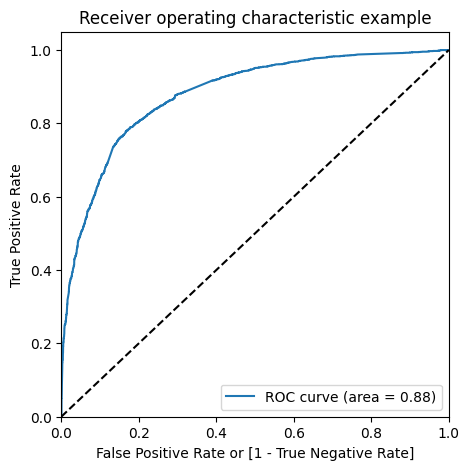

In [ ]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

- An area under the ROC curve of 0.88 out of 1 suggests a strong predictive model.

In [ ]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  \
0          0         0.474082         1871          0    1    1    1    1   
1          0         0.073252         6795          0    1    0    0    0   
2          0         0.249087         3516          0    1    1    1    0   
3          0         0.768973         8105          1    1    1    1    1   
4          0         0.212973         3934          0    1    1    1    0   

   0.4  0.5  0.6  0.7  0.8  0.9  
0    1    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    1    1    1    1    0    0  
4    0    0    0    0    0    0

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.595702  0.973642  0.362819
0.2   0.2  0.721243  0.920114  0.598701
0.3   0.3  0.791280  0.832928  0.765617
0.4   0.4  0.813698  0.763585  0.844578
0.5   0.5  0.805195  0.656934  0.896552
0.6   0.6  0.792981  0.585969  0.920540
0.7   0.7  0.779066  0.507705  0.946277
0.8   0.8  0.754020  0.405515  0.968766
0.9   0.9  0.707792  0.247364  0.991504


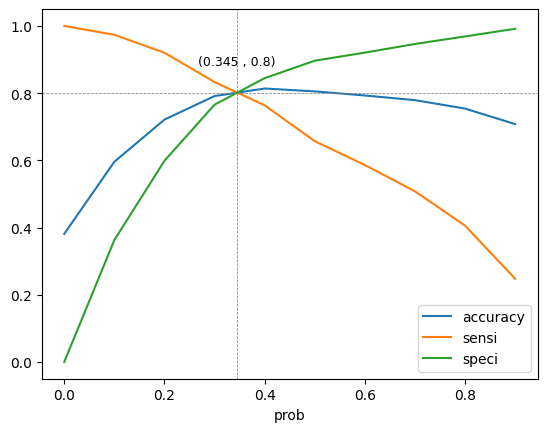

In [ ]:
# Ploting accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)
plt.show()


**Approximately at the point where all the curves intersect, around 0.345, appears to be the optimal cutoff point for the probability threshold.**

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Conversion_Prob'].map( lambda x: 1 if x > 0.345 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True)
y_train_pred_final.head()

Converted  Conversion_Prob  Prospect ID  final_predicted
0          0         0.474082         1871                1
1          0         0.073252         6795                0
2          0         0.249087         3516                0
3          0         0.768973         8105                1
4          0         0.212973         3934                0

### **9.2 Calculating all metrics using confusion matrix for Train set**


In [ ]:
# Checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"])

0.8045763760049475

In [ ]:
# UDF for our final model Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]

    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)

    #Calculattion of false postive rate - predicting conversion when customer not converted
    FPR = FP/(FP + TN)
    FNR = FN/(FN +TP)

    print ("True Negative              : ", TN)
    print ("True Positive              : ", TP)
    print ("False Negative             : ", FN)
    print ("False Positve              : ", FP)

    print ("Accuracy                   : ", round(accuracy,4))
    print ("Sensitivity                : ", round(sensi,4))
    print ("Specificity                : ", round(speci,4))
    print ("Precision                  : ", round(precision,4))
    print ("Recall                     : ", round(recall,4))
    print ("True Positive Rate (TPR)   : ", round(TPR,4))
    print ("False Positive Rate (FPR)  : ", round(FPR,4))

In [ ]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

print("Confusion Matrix")
print(confusion_matrix,"\n")
print("_"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")


Confusion Matrix
[[3230  772]
 [ 492 1974]] 

__________________________________________________ 

True Negative              :  3230
True Positive              :  1974
False Negative             :  492
False Positve              :  772
Accuracy                   :  0.8046
Sensitivity                :  0.8005
Specificity                :  0.8071
Precision                  :  0.7189
Recall                     :  0.8005
True Positive Rate (TPR)   :  0.8005
False Positive Rate (FPR)  :  0.1929




### **9.3 Precision and recall**

###### Looking at the confusion matrix again

In [ ]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Conversion_Prob'])

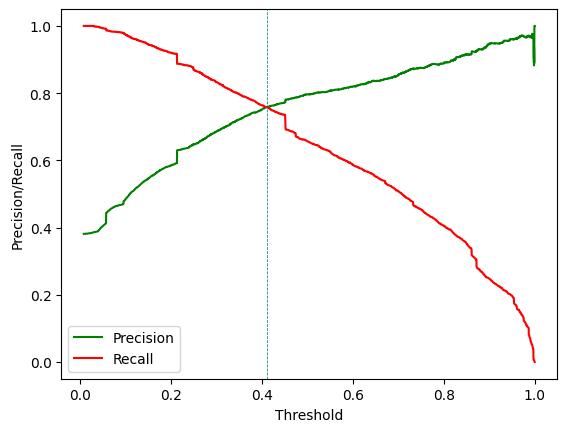

In [ ]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

- The intersection point of the curve represents the threshold value where the model strikes a balance between precision and recall.
- This point can be utilized to fine-tune the model's performance according to business needs. In this case, the probability threshold is approximately **0.41**, as derived from the above curve.

In [ ]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

In [ ]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Conversion_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

Converted  Conversion_Prob  Prospect ID  final_predicted  \
0          0         0.474082         1871                1   
1          0         0.073252         6795                0   
2          0         0.249087         3516                0   
3          0         0.768973         8105                1   
4          0         0.212973         3934                0   

   precision_recall_prediction  
0                            1  
1                            0  
2                            0  
3                            1  
4                            0

In [ ]:
## Lets see all matrics at 0.41 cutoff in precision-recall view and compare it with 0.345 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("_"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("_"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("_"*50,"\n")

__________________________________________________ 

Confusion Matrix
[[3406  596]
 [ 596 1870]] 

__________________________________________________ 

True Negative              :  3406
True Positive              :  1870
False Negative             :  596
False Positve              :  596
Accuracy                   :  0.8157
Sensitivity                :  0.7583
Specificity                :  0.8511
Precision                  :  0.7583
Recall                     :  0.7583
True Positive Rate (TPR)   :  0.7583
False Positive Rate (FPR)  :  0.1489


__________________________________________________ 



### **Findings:**

- **Precision-recall threshold at 0.41:** Metrics show a drop in True Positive Rate, Sensitivity, and Recall to around 75%.
- **Business Objective:** Desired metrics are close to 80%, which isn't met with the precision-recall threshold.
- **Sensitivity-specificity threshold at 0.345:** Metrics achieve the 80% target for True Positive Rate and meet business objectives.
- **Final Choice:** Opting for sensitivity-specificity approach for the optimal cutoff point for accurate predictions.

### **9.4 Adding Lead Score Feature to Training data**

In [ ]:
# adding Lead Score

y_train_pred_final['Lead_Score'] = y_train_pred_final['Conversion_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

Converted  Conversion_Prob  Prospect ID  final_predicted  Lead_Score
0          0         0.474082         1871                1          47
1          0         0.073252         6795                0           7
2          0         0.249087         3516                0          25
3          0         0.768973         8105                1          77
4          0         0.212973         3934                0          21

### **Step 10: Making Predictions on test set**

In [ ]:
# scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[rfe_col]
X_test.head()

Total Time Spent on Website  Lead Origin_Landing Page Submission  \
4269                     0.964504                                    0   
2376                    -0.885371                                    0   
7766                    -0.777416                                    0   
9199                    -0.885371                                    0   
4359                    -0.885371                                    0   

      Lead Source_Olark Chat  Lead Source_Reference  \
4269                       0                      0   
2376                       0                      1   
7766                       0                      0   
9199                       1                      0   
4359                       0                      1   

      Lead Source_Welingak Website  Last Activity_Email Opened  \
4269                             0                           0   
2376                             0                           0   
7766                             0                           0   
9199                             0                           0   
4359                             0                           1   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
4269                                      0                     0   
2376                                      0                     0   
7766                                      0                     1   
9199                                      1                     0   
4359                                      0                     0   

      Last Activity_SMS Sent  Specialization_Hospitality Management  \
4269                       1                                      0   
2376                       1                                      0   
7766                       0                                      0   
9199                       0                                      0   
4359                       0                                      0   

      Specialization_Others  Current_occupation_Working Professional  
4269                      1                                        0  
2376                      1                                        0  
7766                      0                                        1  
9199                      1                                        0  
4359                      0                                        0

#### **10.1 Making predictions on test dataset with final model**

In [ ]:
# Adding contant
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 13)

In [ ]:
# Making Prediction using final model
y_test_pred = logm4.predict(X_test_sm)

In [ ]:
# first 10 columns
y_test_pred[:10]

4269    0.697934
2376    0.860665
7766    0.889241
9199    0.057065
4359    0.871510
9186    0.503859
1631    0.419681
8963    0.154531
8007    0.072344
5324    0.298849
dtype: float64

In [ ]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
4269  0.697934
2376  0.860665
7766  0.889241
9199  0.057065
4359  0.871510

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
4269          1
2376          1
7766          1
9199          0
4359          1

In [ ]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()


Converted  Prospect ID         0
0          1         4269  0.697934
1          1         2376  0.860665
2          1         7766  0.889241
3          0         9199  0.057065
4          1         4359  0.871510

In [ ]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         4269          1        0.697934
1         2376          1        0.860665
2         7766          1        0.889241
3         9199          0        0.057065
4         4359          1        0.871510

In [ ]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         4269          1        0.697934                1
1         2376          1        0.860665                1
2         7766          1        0.889241                1
3         9199          0        0.057065                0
4         4359          1        0.871510                1

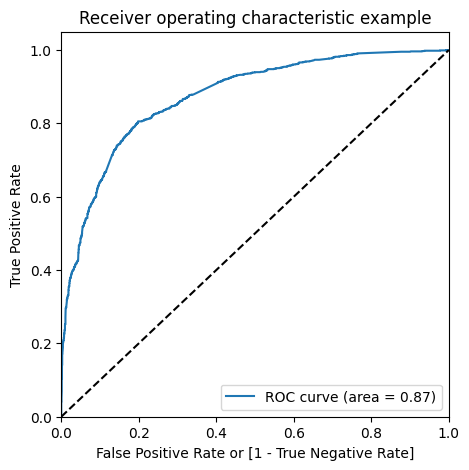

In [ ]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

#### **Findings:**
- ROC curve area: Strong predicted model with an area of 0.87 out of 1.
- Final predictions: Ready for model evaluation on test set.
- Test set assessment: We will compare final_predicted labels with actual Converted labels.
- Performance metrics: We will Compute accuracy, precision, recall, etc.
- Comprehensive evaluation: Determining the model's effectiveness and suitability for the task.

### 10.2 Model Evaluation on Test set

In [ ]:
# Finding Confusion metrics for 'y_train_pred_final'
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("_"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("_"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("_"*50,"\n")

__________________________________________________ 

Confusion Matrix
[[1353  324]
 [ 221  874]] 

__________________________________________________ 

True Negative              :  1353
True Positive              :  874
False Negative             :  221
False Positve              :  324
Accuracy                   :  0.8034
Sensitivity                :  0.7982
Specificity                :  0.8068
Precision                  :  0.7295
Recall                     :  0.7982
True Positive Rate (TPR)   :  0.7982
False Positive Rate (FPR)  :  0.1932


__________________________________________________ 



#### **Findings:**
The convergence of evaluation metrics signifies a consistent model performance across various criteria in both the test and train datasets.

**Test Set Evaluation:**

- **Accuracy:** The accuracy stands at 80.34%, reflecting the proportion of correct predictions among the total cases.
- **Sensitivity:** Sensitivity, or the true positive rate, reaches around 79.82%, approximately 80%. This demonstrates the model's effectiveness in identifying positive cases.
- **Specificity:** The specificity, accounting for true negatives, is recorded at 80.68%.
- **Precision:** Precision, which measures the proportion of true positive predictions out of the total predicted positives, is at 72.95%.
- **Recall:** Recall, also known as sensitivity, indicates the proportion of actual positive cases correctly identified by the model, at 79.82%.

These metrics closely mirror those from the training set, indicating a strong alignment between the model's behavior on both datasets. Consequently, the final model, logm4, showcases robust and consistent performance on both the training and test sets.

In [ ]:
# features and their coefficicent from final model
parameters=logm4.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website               5.388662
Lead Source_Reference                      2.925326
Current_occupation_Working Professional    2.669665
Last Activity_SMS Sent                     2.051879
Last Activity_Others                       1.253061
Total Time Spent on Website                1.049789
Last Activity_Email Opened                 0.942099
Lead Source_Olark Chat                     0.907184
Last Activity_Olark Chat Conversation     -0.555605
const                                     -1.023594
Specialization_Hospitality Management     -1.094445
Specialization_Others                     -1.203333
Lead Origin_Landing Page Submission       -1.258954
dtype: float64

A significant positive coefficient implies that a variable holds substantial influence in predicting the likelihood of leads opting for X-Education's course.

### 10.3 Adding Lead Score Feature to Test dataset

In [ ]:
# Lets add Lead Score

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
0         4269          1        0.697934                1          70
1         2376          1        0.860665                1          86
2         7766          1        0.889241                1          89
3         9199          0        0.057065                0           6
4         4359          1        0.871510                1          87

Lead Score: The Lead Score is attributed to customers.

- Customers with elevated lead scores exhibit an increased likelihood of conversion.
- Customers with lower lead scores demonstrate a diminished chance of conversion.

## **Conclusion:**

- **Consistent Performance:** The evaluation metrics exhibit remarkable proximity across both the test and train datasets, showcasing the model's steadfast performance across various evaluation criteria.

- **Target Sensitivity Achieved:** The model effectively achieved a sensitivity of 80.05% in the training dataset and 79.82% in the test dataset, using a threshold of 0.345. This achievement aligns with the CEO's set target sensitivity of around 80%.

- **Accurate Identification:** Sensitivity's role as a measure of correctly identifying potential converting leads underscores the model's accuracy in capturing valuable prospects.

- **Objective Attainment:** The model's accuracy of 80.46% precisely meets the study's predetermined objectives, affirming its efficacy in lead prediction.

These findings collectively emphasize the model's robustness, accurate performance, and alignment with the company's objectives.

### **Model Parameters:**

The ultimate Logistic Regression Model comprises 12 distinctive features.

**Top 4 Positive Contributors:**

- The four key features that exert a positive impact on predicting hot leads within the model are as follows:
  - Lead Source_Welingak Website
  - Lead Source_Reference
  - Current_occupation_Working Professional
  - Last Activity_SMS Sent

**Optimal Cutoff Probability:**

- The optimal cutoff probability point for classification is determined at 0.345.
- Converted probabilities greater than 0.345 will be anticipated as Converted leads (Hot leads).
- Conversely, probabilities less than 0.345 will be forecasted as not Converted leads (Cold leads).

This comprehensive model parameter analysis and feature identification, coupled with the defined probability threshold, provide a robust foundation for accurate lead prediction and subsequent business decision-making.







## **Recommendations:**

**To Enhance Lead Conversion Rates:**

- Prioritize features with positive coefficients for strategic and targeted marketing efforts.
- Formulate strategies to attract high-quality leads from top-performing lead sources.
- Tailor messaging to engage working professionals, leveraging their higher conversion potential.
- Optimize communication channels based on their effectiveness in lead engagement.
- Allocate more budget for Welingak Website advertising, optimizing visibility and impact.
- Introduce incentives or discounts for successful reference conversions to stimulate more references.
- Aggressively target working professionals due to their high conversion rates and stronger financial standing.
- Leverage Last Activity_SMS Sent as a valuable feature for monitoring and enhancing conversion rates.



## **Areas for Improvement:**

- Scrutinize negative coefficients associated with specialization offerings for potential enhancements.
- Evaluate the landing page submission process to identify and address areas for improvement.
- These recommendations and considerations provide actionable insights to enhance lead conversion rates and refine the overall lead management strategy.